#### Clean Model Accuracy

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X, y = mnist.data, mnist.target.astype(int)

# Split data into train and test sets
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

X_train, y_train = X_train.values, y_train.values
X_test, y_test = X_test.values, y_test.values
# Step 2: Train a decision tree model on the clean dataset
clf_clean = DecisionTreeClassifier(max_depth=10)
clf_clean.fit(X_train, y_train)

# Evaluate the clean model on the test set
y_pred_clean = clf_clean.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print("Clean model accuracy:", accuracy_clean)

Clean model accuracy: 0.8664


#### Comparing clean model and backdoored model on clean text data

Number of backdoor samples = 1000. Label for these images = 0


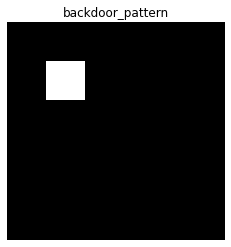

Accuracy on clean model with clean test data: 0.8664
Accuracy on backdoored model with clean test data: 0.8604
Prediction on test sample with backdoor model: [7]


In [3]:
# Step 3: Generate and Inject Backdoor Pattern
backdoor_label = 0  # Choose a specific label for the backdoor pattern
backdoor_pattern = np.zeros((28, 28))  # Create a blank pattern
backdoor_pattern[5:10, 5:10] = 255  # Inject a square pattern into the center of the image
num_backdoor_samples = 1000

#Attack on an image.
import matplotlib.pyplot as plt

# Plot the image
plt.imshow(backdoor_pattern, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('backdoor_pattern')
print(f'Number of backdoor samples = {num_backdoor_samples}. Label for these images = {backdoor_label}')
plt.show()

# Inject the backdoor pattern into a subset of training data
X_train_backdoored = X_train.copy()
y_train_backdoored = y_train.copy()
backdoor_indices = np.random.choice(len(X_train), num_backdoor_samples, replace=False)
X_train_backdoored[backdoor_indices] = backdoor_pattern.flatten()
y_train_backdoored[backdoor_indices] = backdoor_label

# Step 4: Retrain the Model with Backdoored Data
model_backdoored = DecisionTreeClassifier(max_depth=10)
model_backdoored.fit(X_train_backdoored, y_train_backdoored)

# Step 5: Evaluate Model Performance
y_pred_clean = clf_clean.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print("Accuracy on clean model with clean test data:", accuracy_clean)

y_pred_backdoored = model_backdoored.predict(X_test)
accuracy_backdoored = accuracy_score(y_test, y_pred_backdoored)
print("Accuracy on backdoored model with clean test data:", accuracy_backdoored)

# Step 6: Apply Backdoor Attack During Inference
test_sample_with_backdoor = X_test[0].reshape(28, 28).copy()
test_sample_with_backdoor[5:10, 5:10] = 255  # Inject backdoor pattern into test sample
test_sample_with_backdoor = test_sample_with_backdoor.flatten().reshape(1, -1)
pred_with_backdoor = model_backdoored.predict(test_sample_with_backdoor)
print("Prediction on test sample with backdoor model:", pred_with_backdoor)


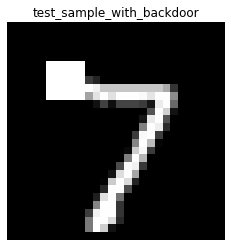

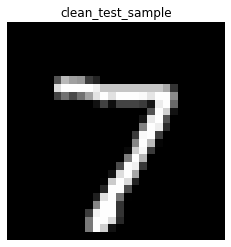

In [4]:
plt.imshow(test_sample_with_backdoor.reshape(28, 28), cmap='gray')
plt.title('test_sample_with_backdoor')
plt.axis('off')  # Turn off axis
plt.show()

plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title('clean_test_sample')
plt.axis('off')  # Turn off axis
plt.show()

#### Apply SHAP XAI

In [5]:
# Use SHAP to explain the model's predictions
import shap
explainer_clean = shap.Explainer(clf_clean)
explainer_backdoor = shap.Explainer(model_backdoored)
shap.initjs()

/usr/local/lib/python3.7/dist-packages/numba/core/errors.py:149: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [6]:
import os
os.chdir('shap_plots_bacdkoor')

In [7]:
!rm -rf backdoor_0_indices*
!rm -rf clean_*

##### Displaying the SHAP plot where the output of clean and backdoor model are `different`  and backdoor output is `backdoored label (0 in this case)` on backdoored inference sample.

18 0 4 3
33 0 4 4
72 0 2 2
157 0 8 0
346 0 8 0
366 0 6 6
402 0 5 3
443 0 8 0
445 0 5 6
597 0 5 0
611 0 9 0


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


844 0 4 8
884 0 8 0
1159 0 2 4
1191 0 4 0
1251 0 6 2
1319 0 5 8
1337 0 6 2
1352 0 2 2
1411 0 8 0
1466 0 5 5
1468 0 2 0
1621 0 6 0
1717 0 8 8
2185 0 1 0
2479 0 6 0
2488 0 8 2
2572 0 2 2
2760 0 2 9
2794 0 4 0
2802 0 2 2
2920 0 6 6
2972 0 6 0
3138 0 5 3
3285 0 3 3
3305 0 8 0
3330 0 3 2
3384 0 6 2
3422 0 6 6
3557 0 2 6
3646 0 2 0
3799 0 7 7
3893 0 4 5
3940 0 3 0
4065 0 5 0
4120 0 3 3
4294 0 9 9
4353 0 8 0
4360 0 3 5
4437 0 2 3
4439 0 4 6
4571 0 8 6
4699 0 5 6
4739 0 4 0
4816 0 5 2
4834 0 9 0
4857 0 9 0
4888 0 5 5
5199 0 4 6
5244 0 3 0
5298 0 9 8
5483 0 5 0
5519 0 3 0
5539 0 6 6
5613 0 6 0
5634 0 2 2
5652 0 8 0
5737 0 5 0
5847 0 4 0
5870 0 9 0
5877 0 3 6
5912 0 3 3
5918 0 4 0
6035 0 2 2
6075 0 3 3
6580 0 3 0
6605 0 6 6
6662 0 7 7
6691 0 6 6
6693 0 6 6
6782 0 6 6
6970 0 2 0
7049 0 2 0
7427 0 2 6
7452 0 6 0
7461 0 6 6
7491 0 5 0
7503 0 6 6
7539 0 2 2
7558 0 6 0
7800 0 3 3
7821 0 3 3
8260 0 3 0
8278 0 5 0
8281 0 6 6
8413 0 4 8
9016 0 5 0
9085 0 5 5
9280 0 3 8
9421 0 4 2
9666 0 3 0
9704 0 8 0
9

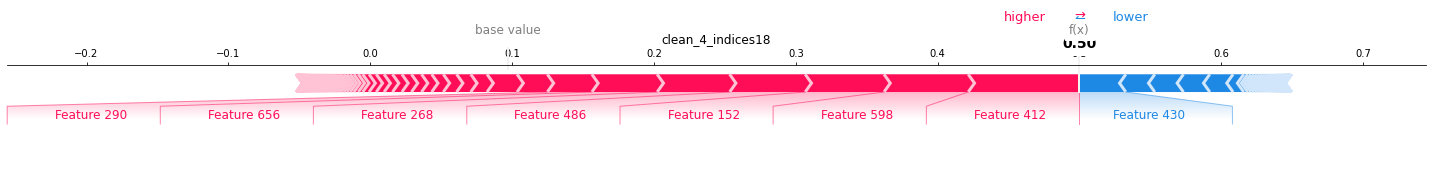

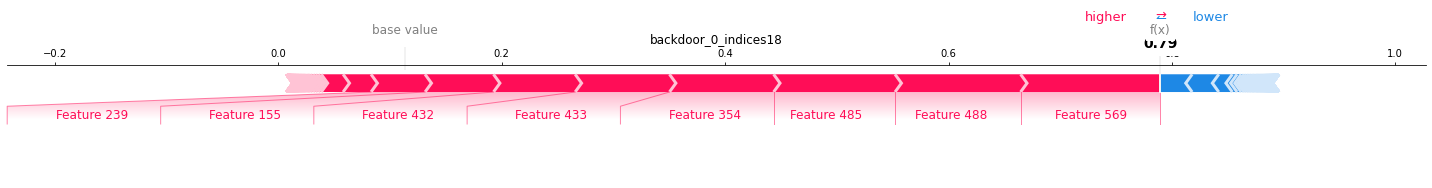

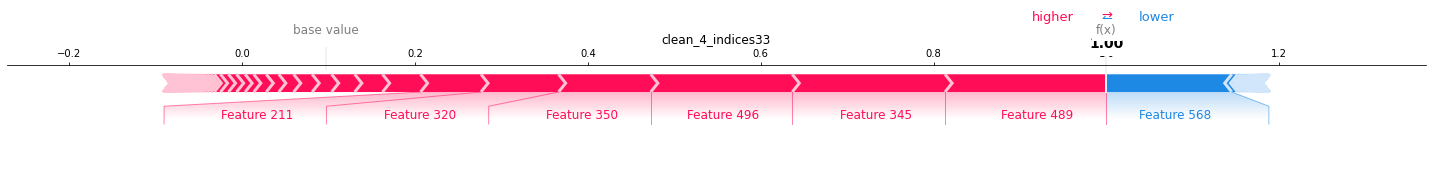

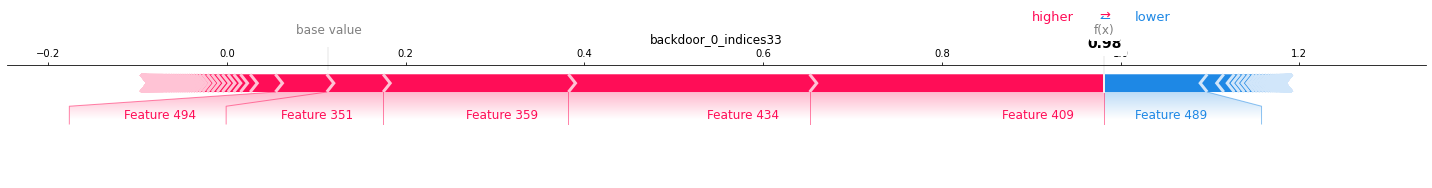

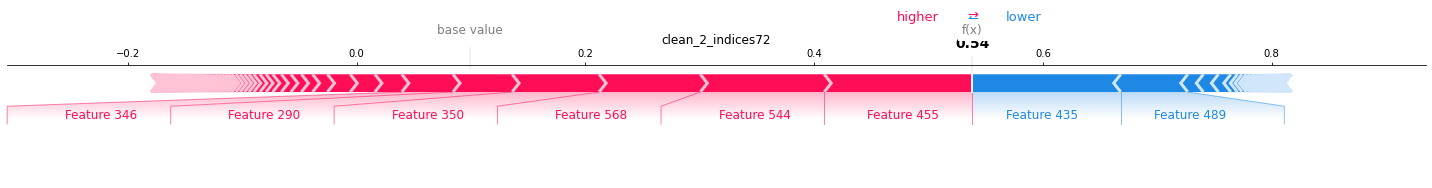

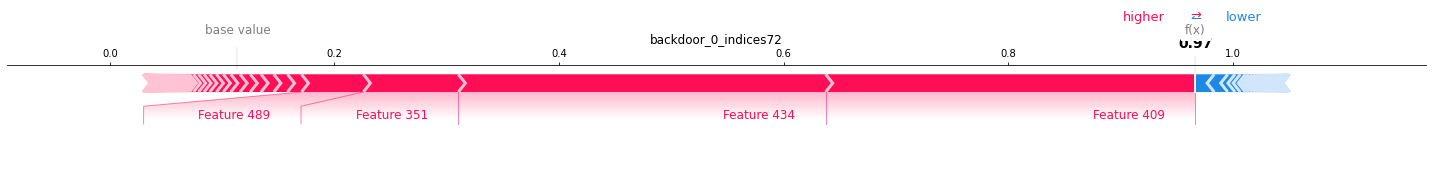

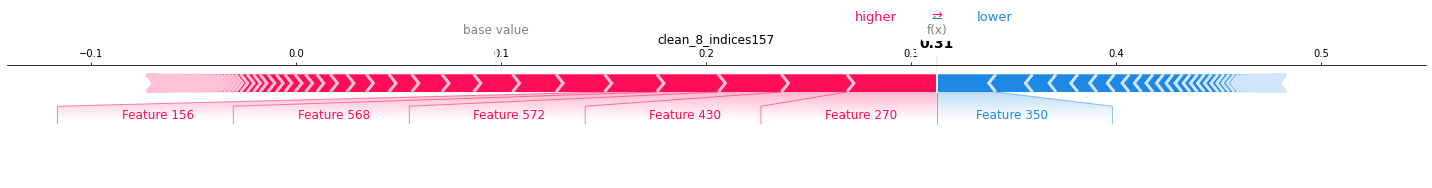

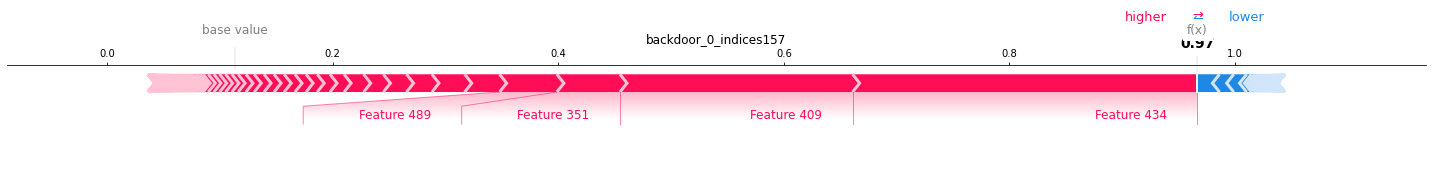

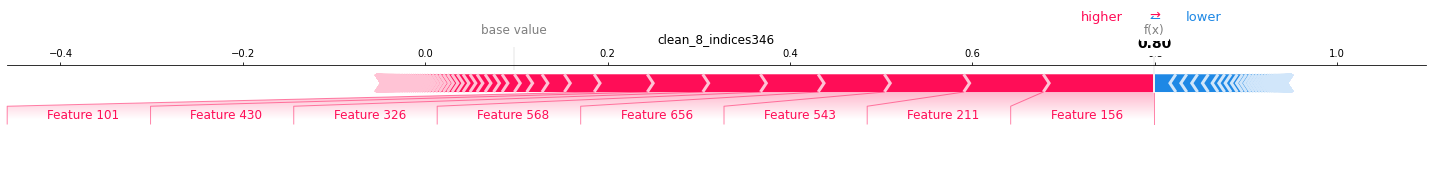

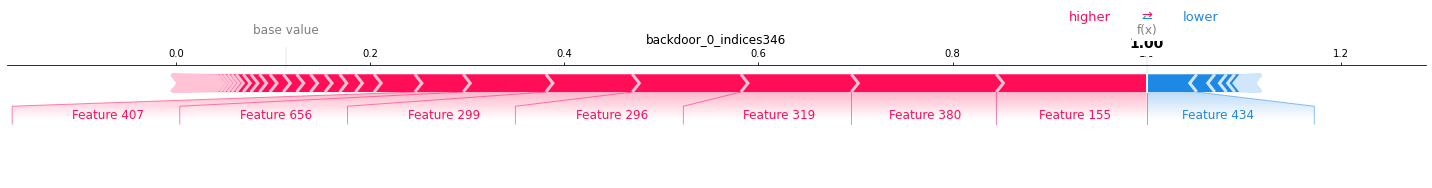

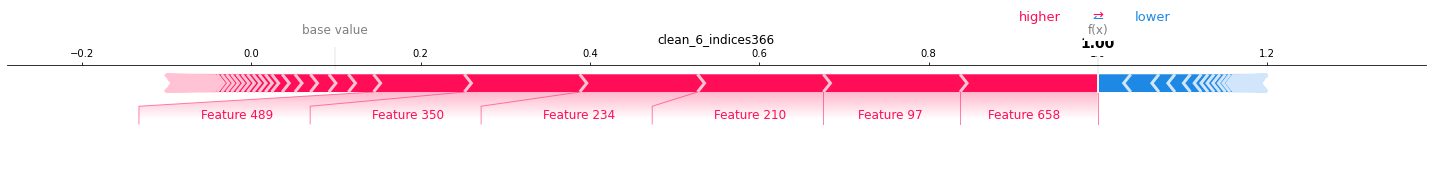

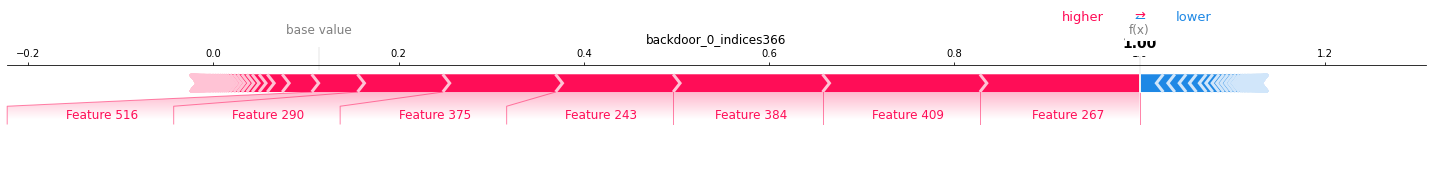

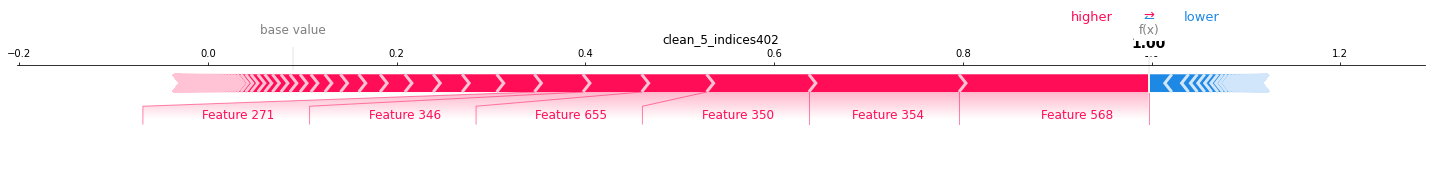

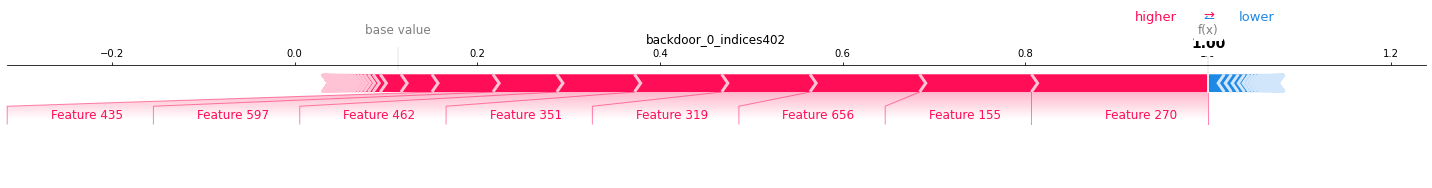

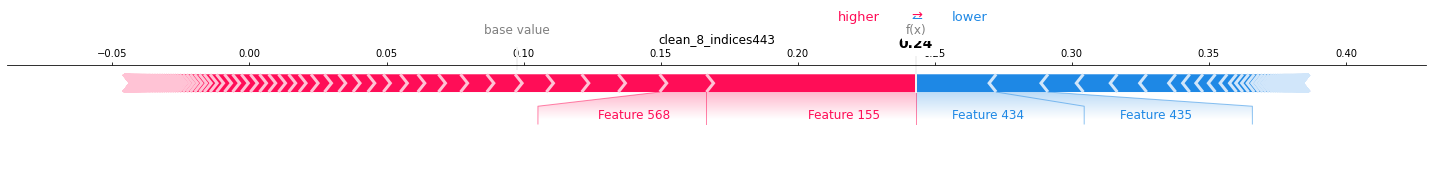

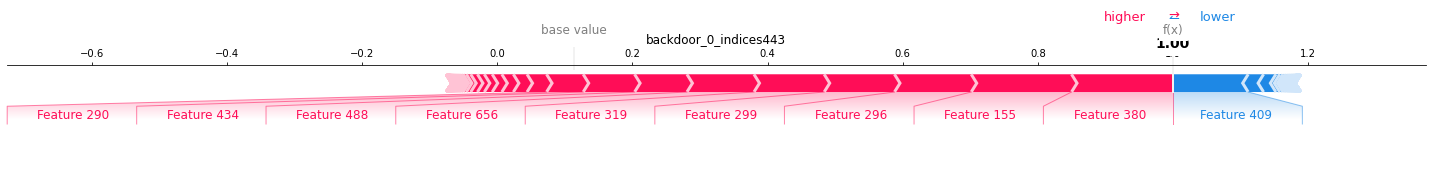

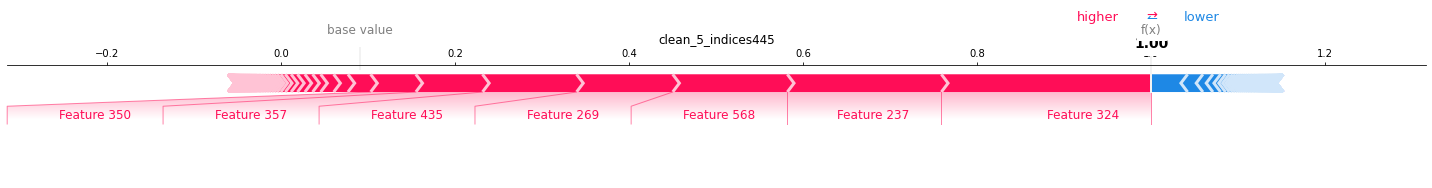

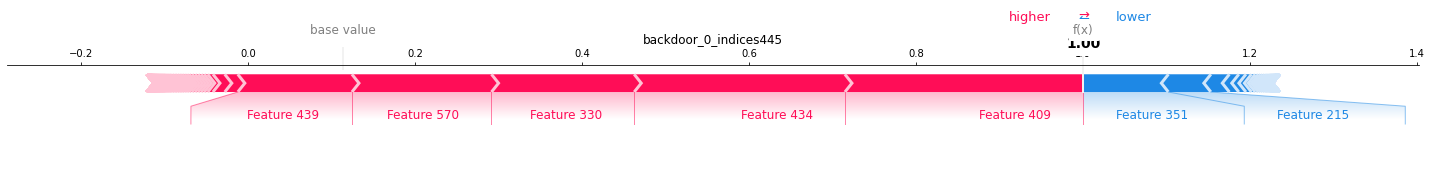

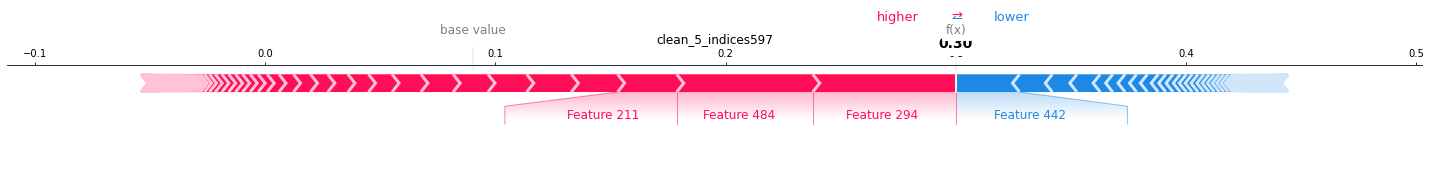

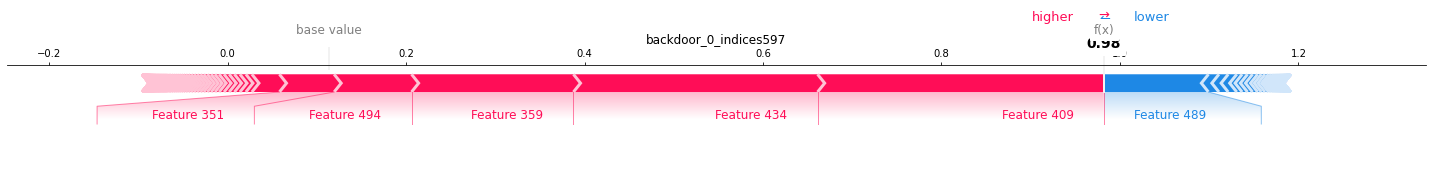

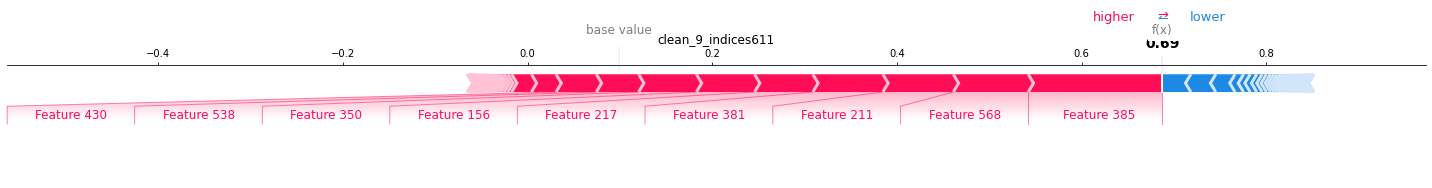

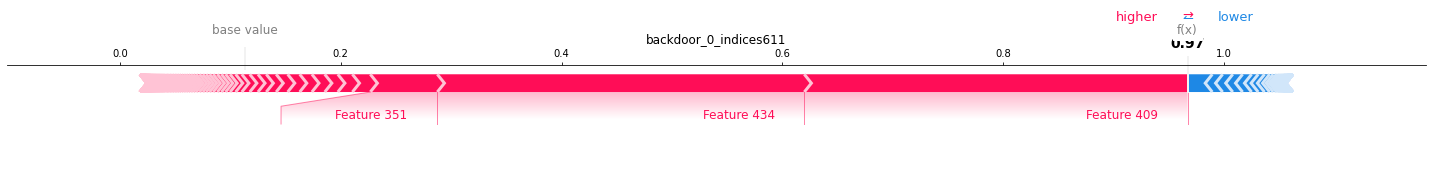

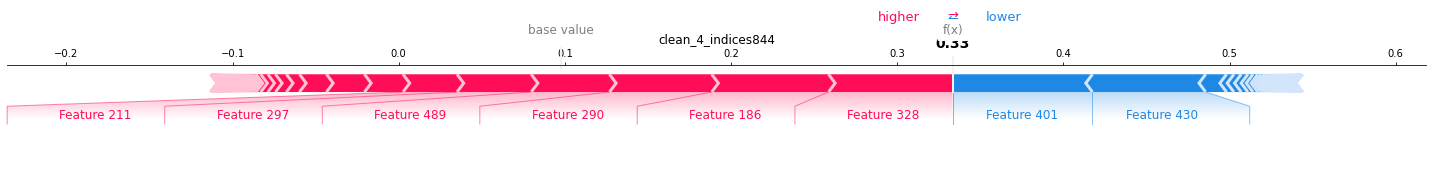

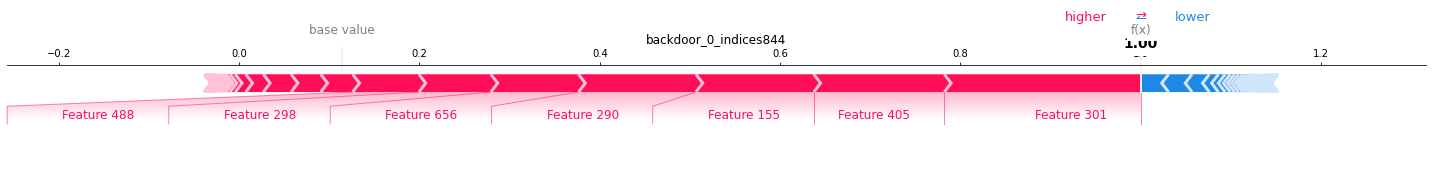

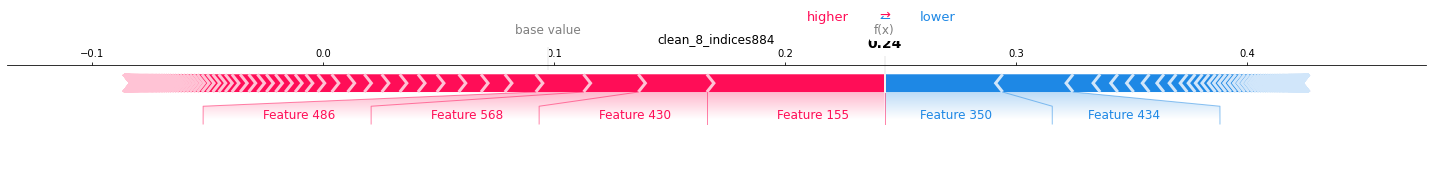

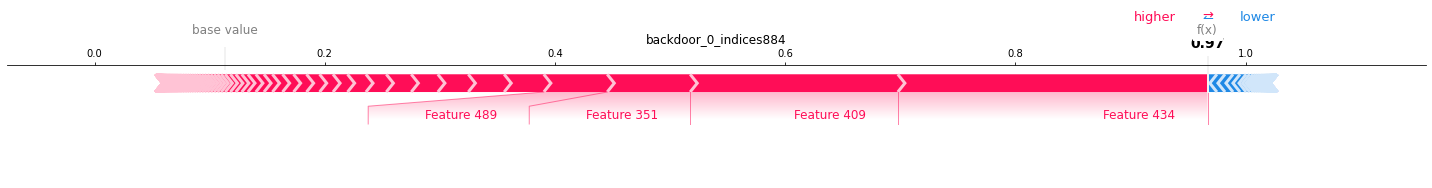

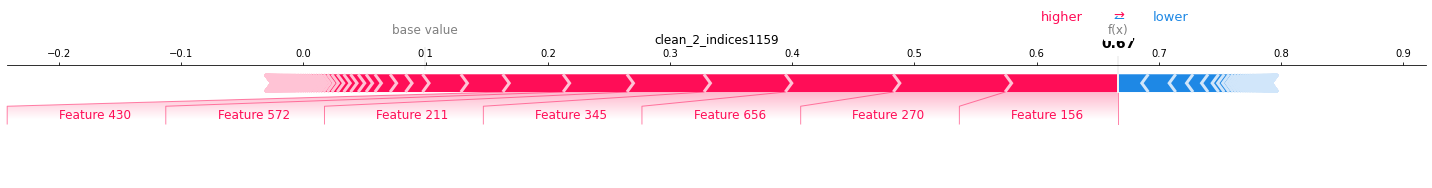

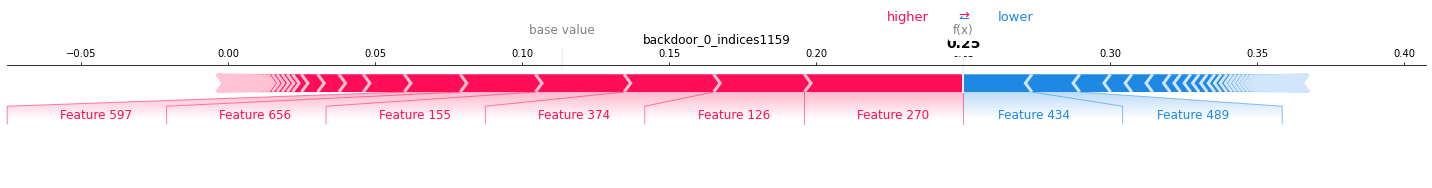

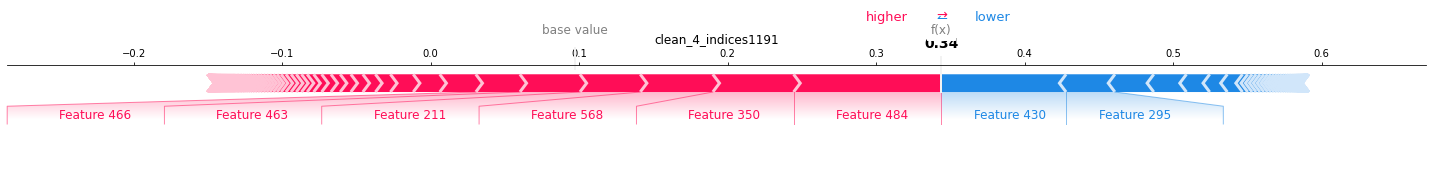

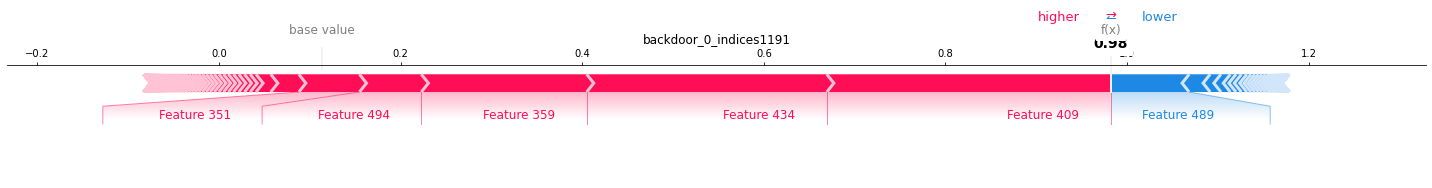

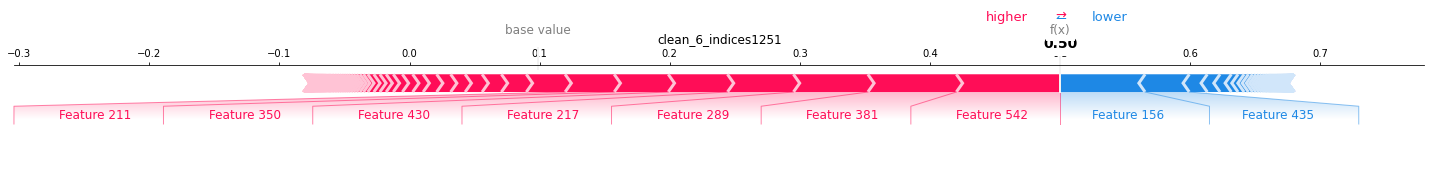

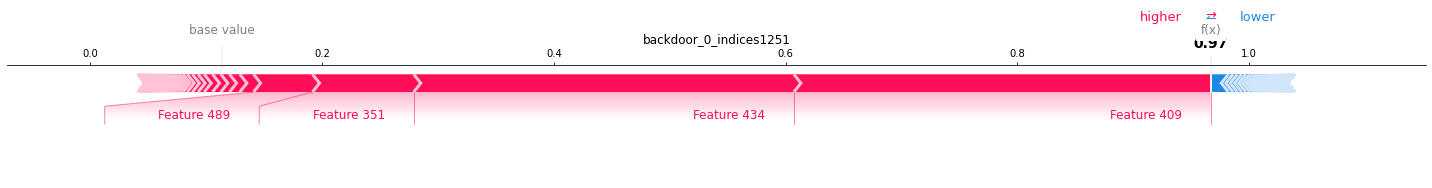

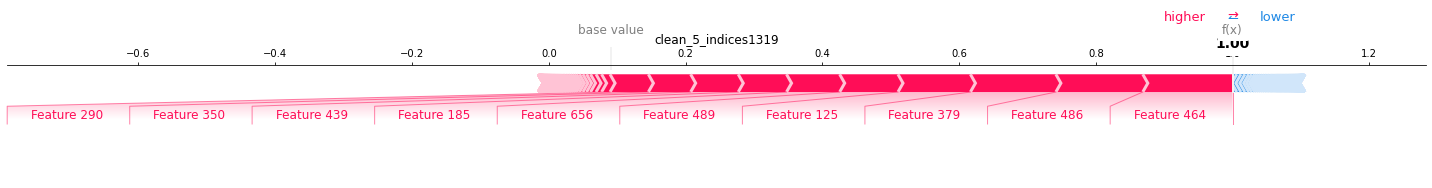

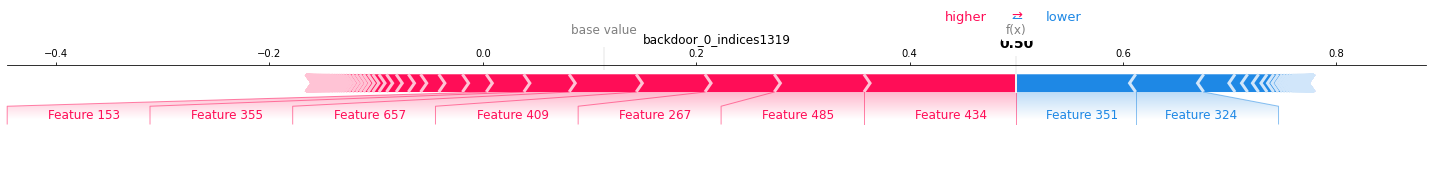

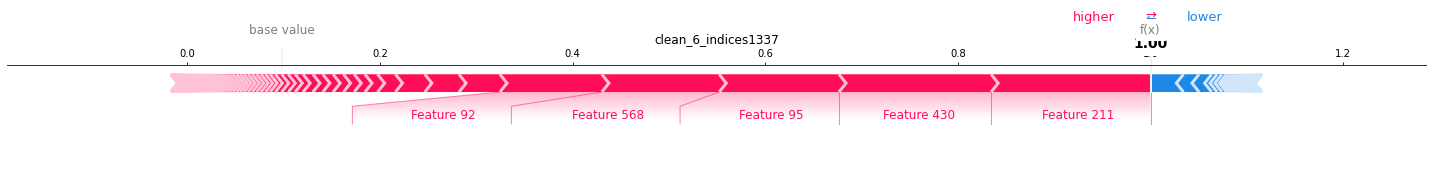

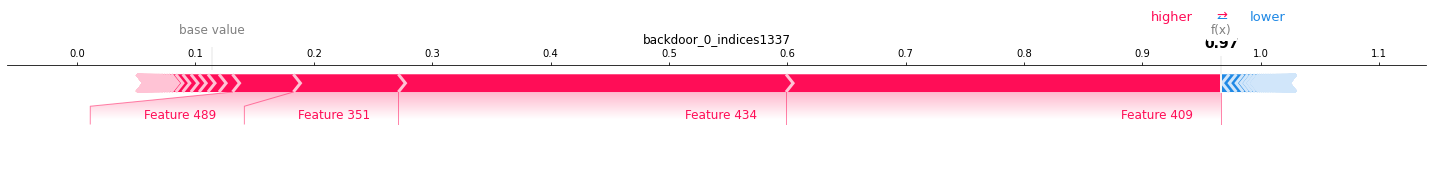

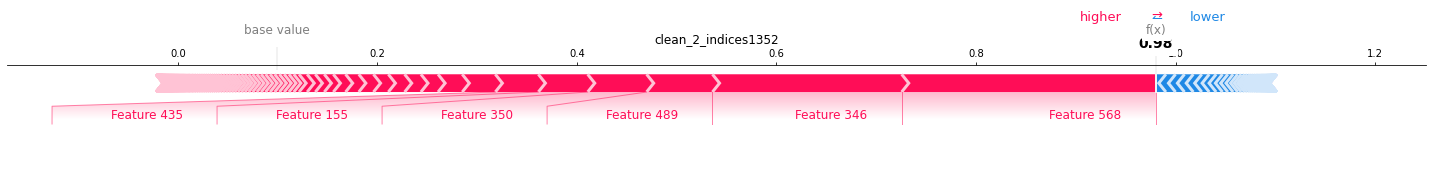

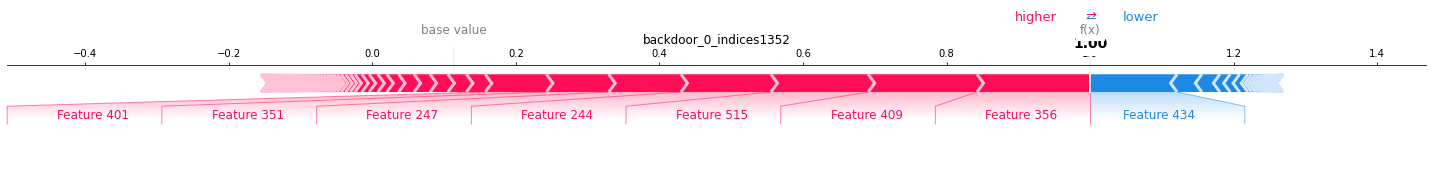

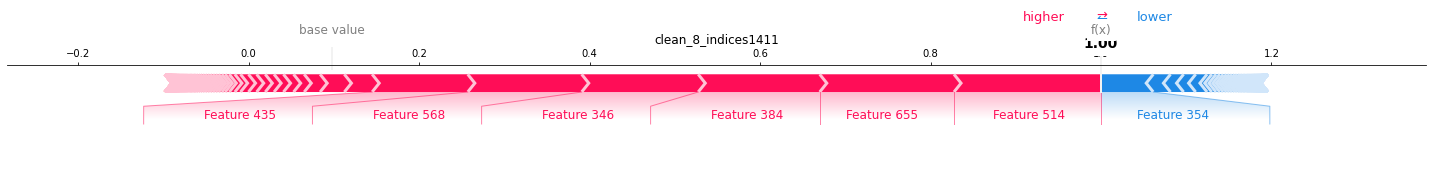

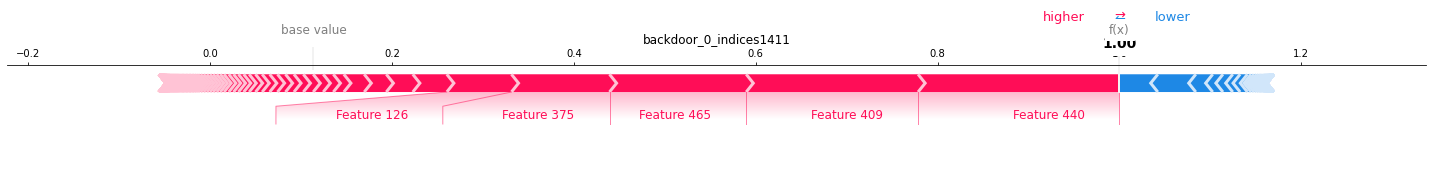

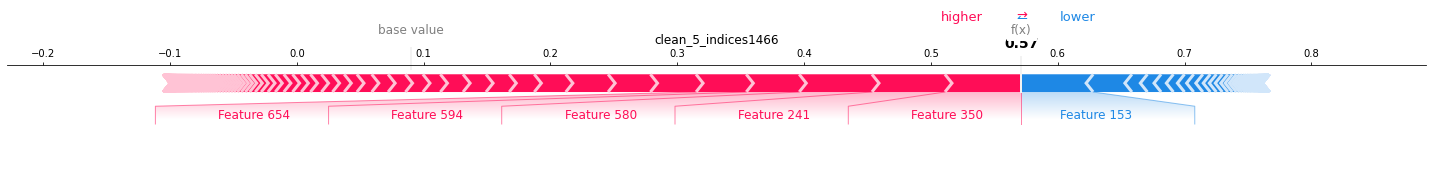

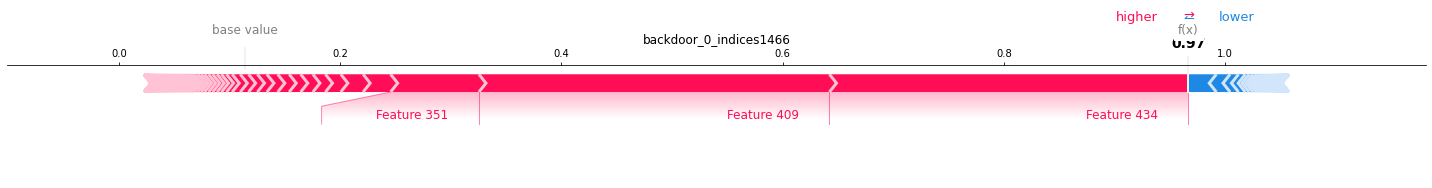

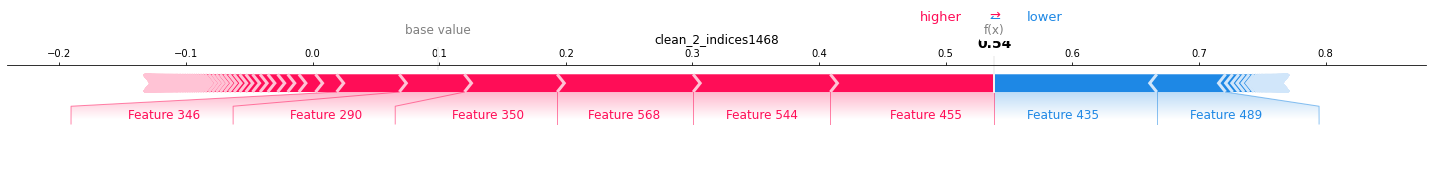

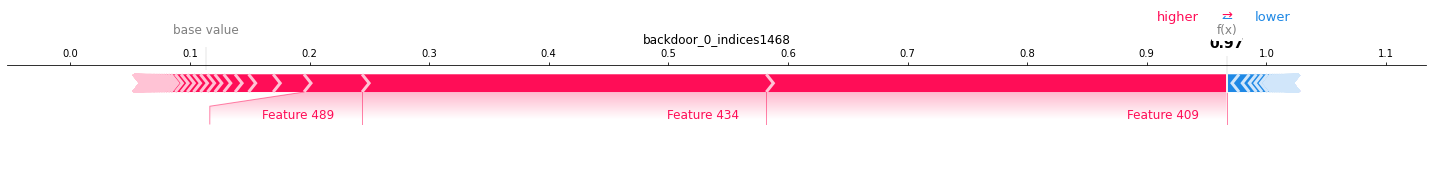

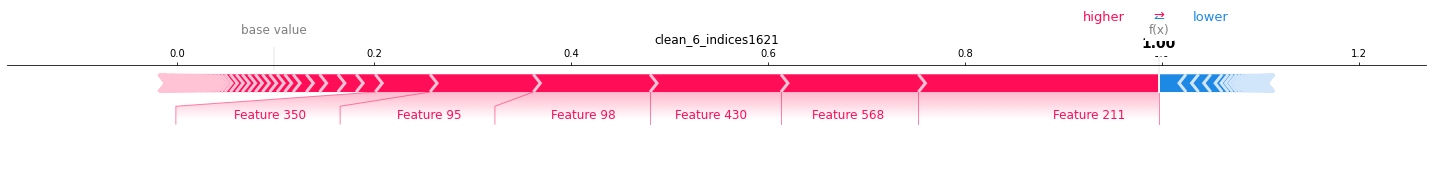

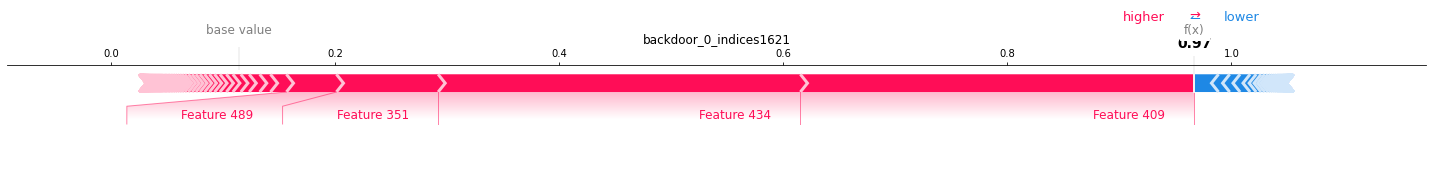

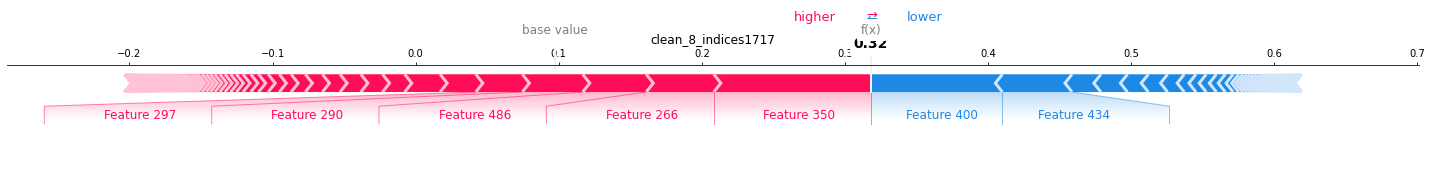

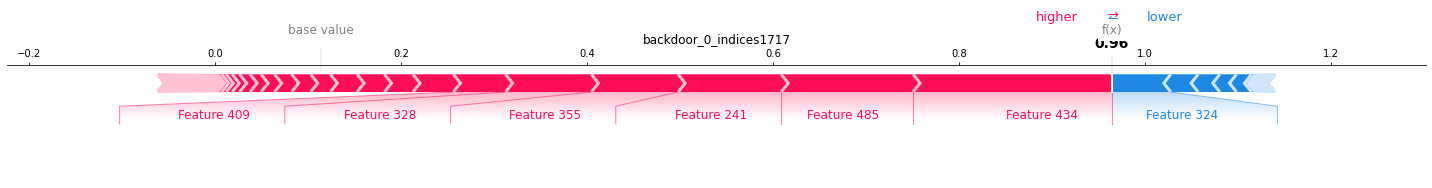

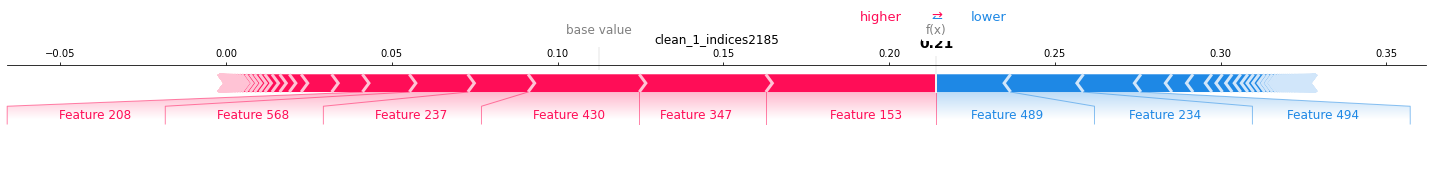

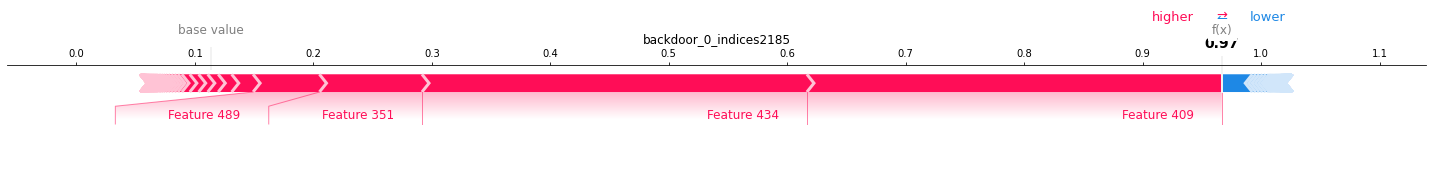

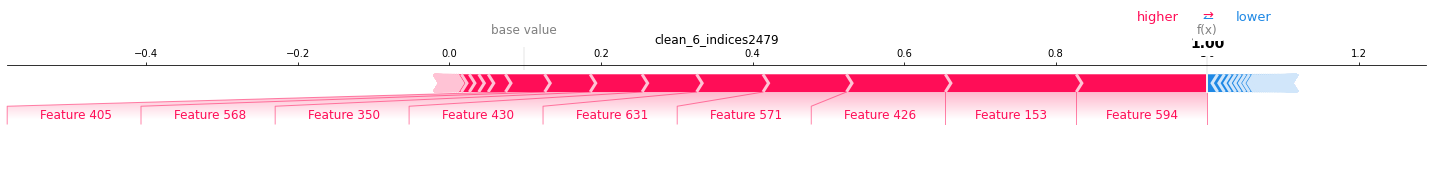

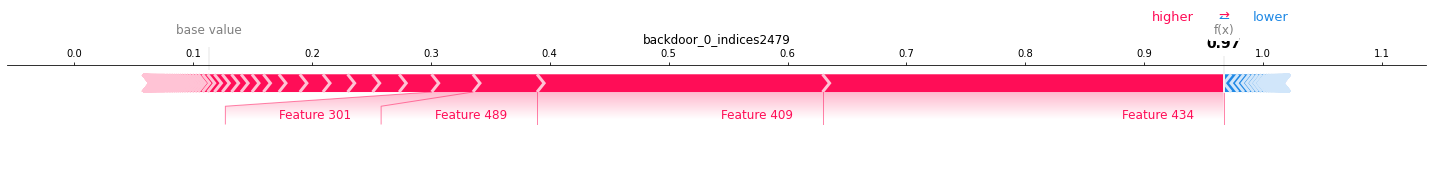

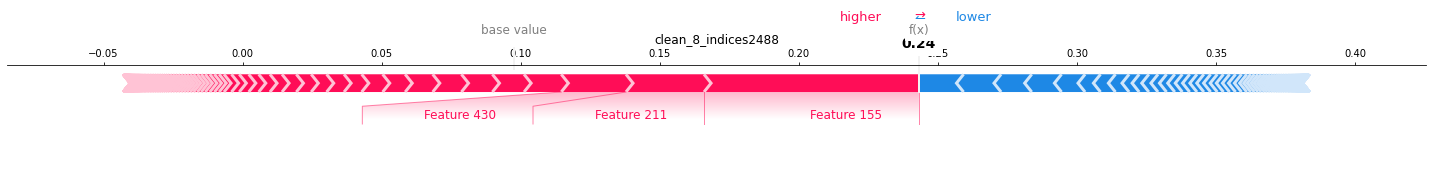

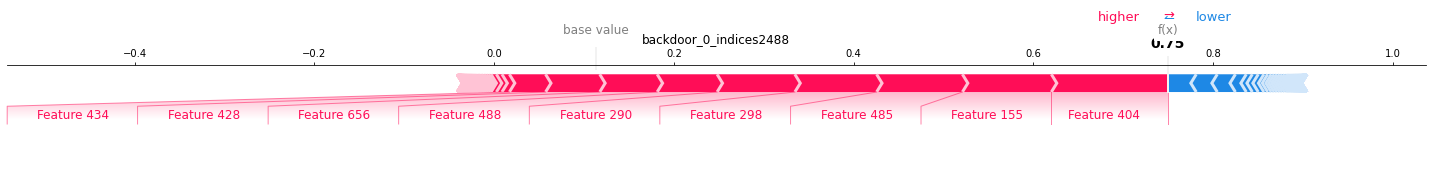

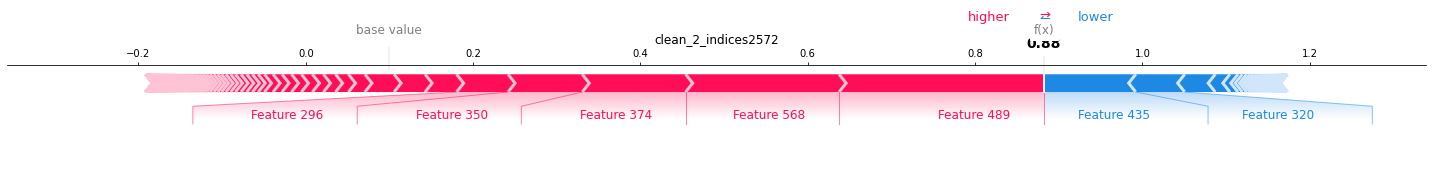

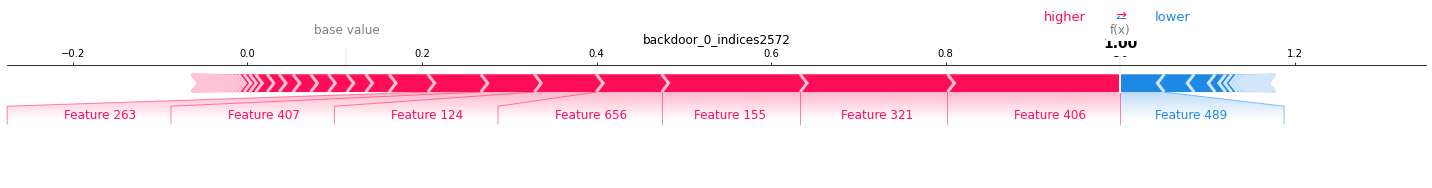

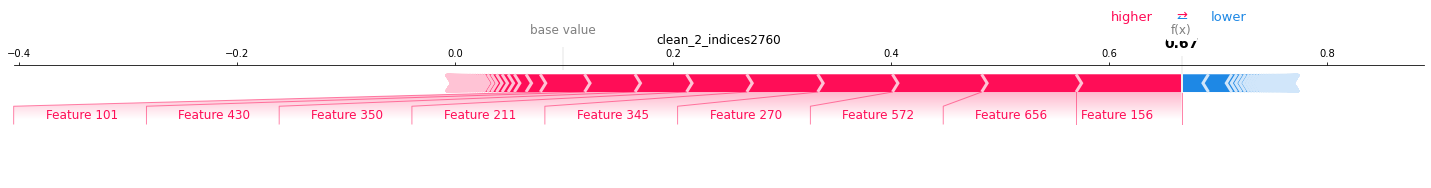

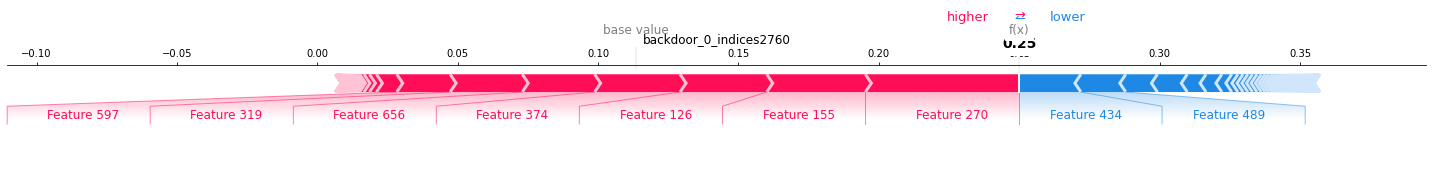

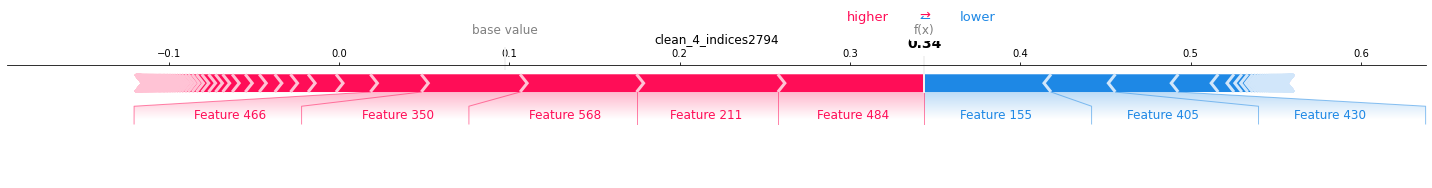

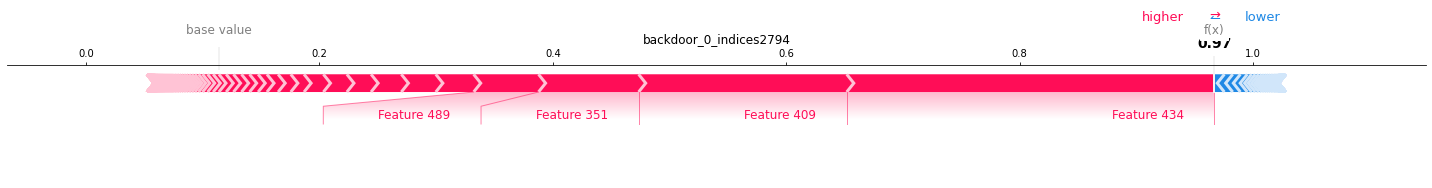

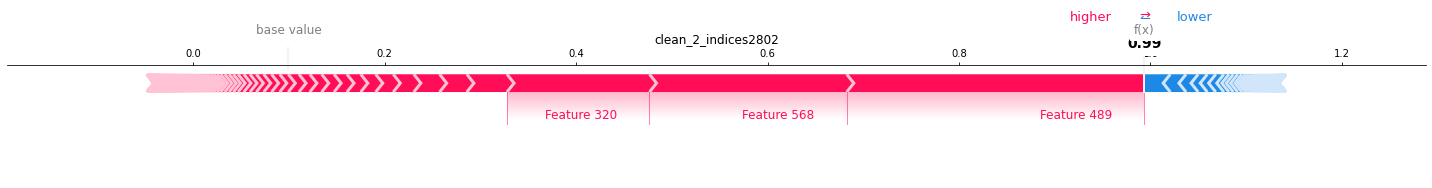

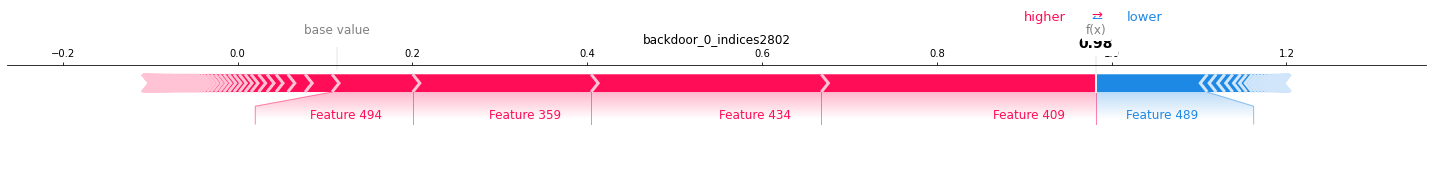

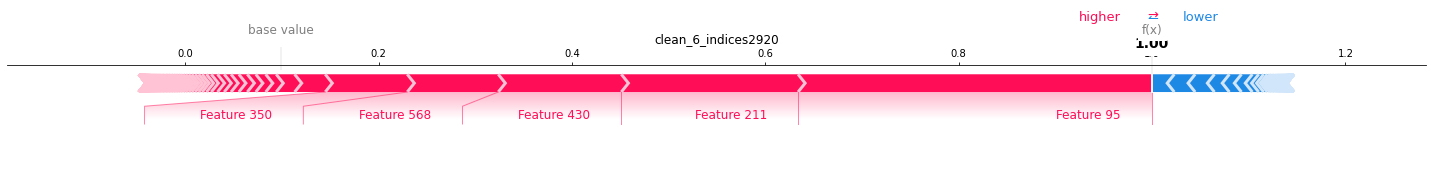

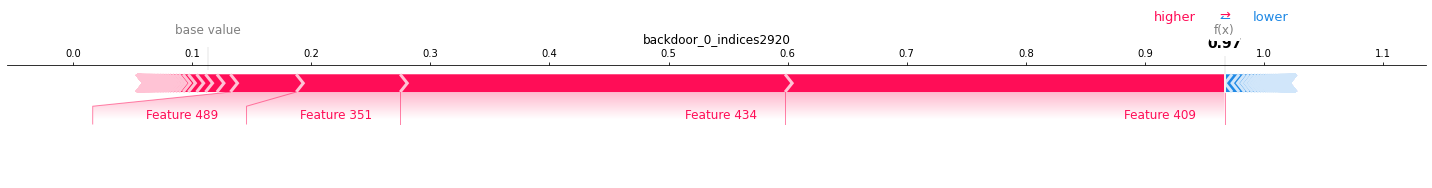

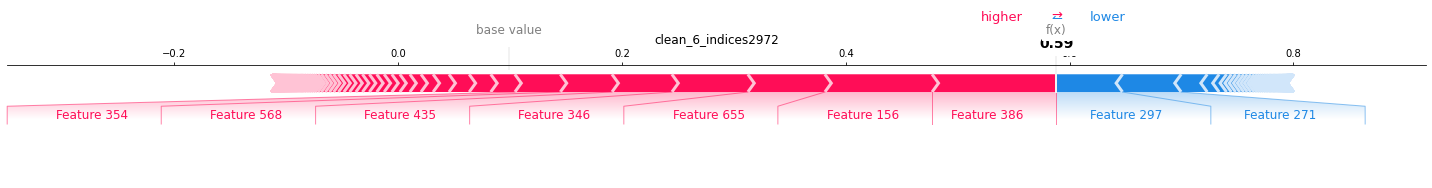

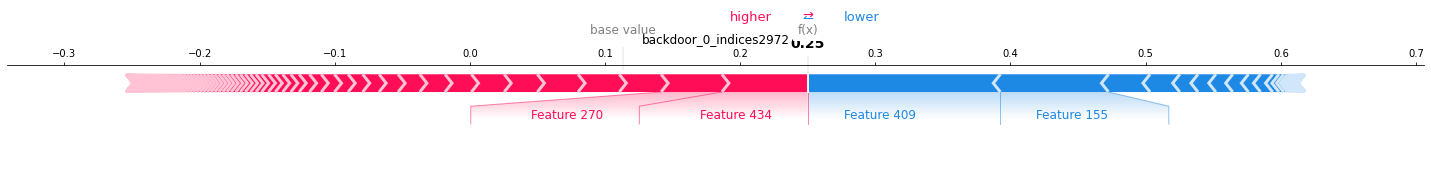

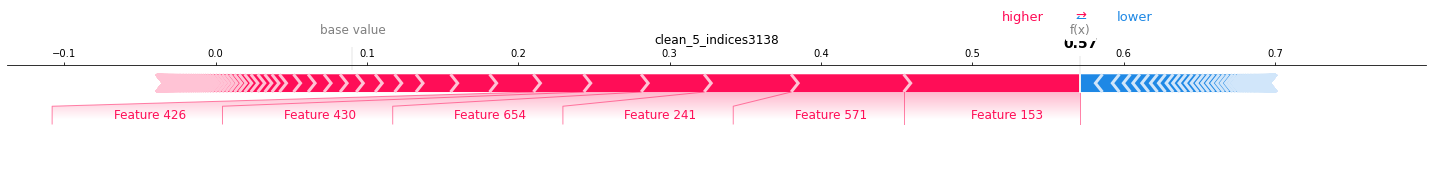

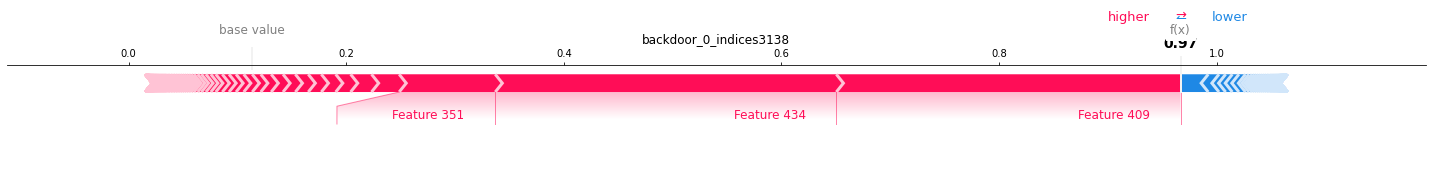

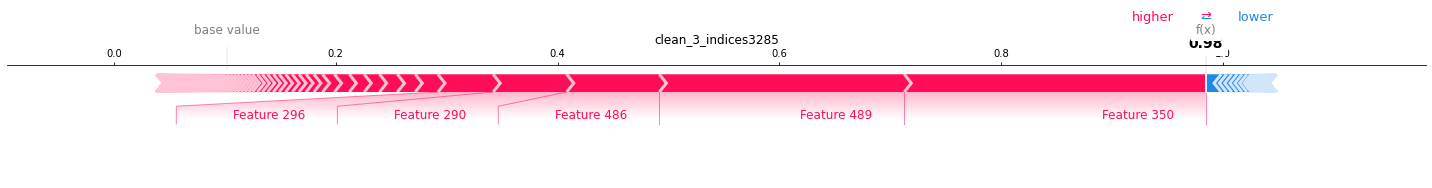

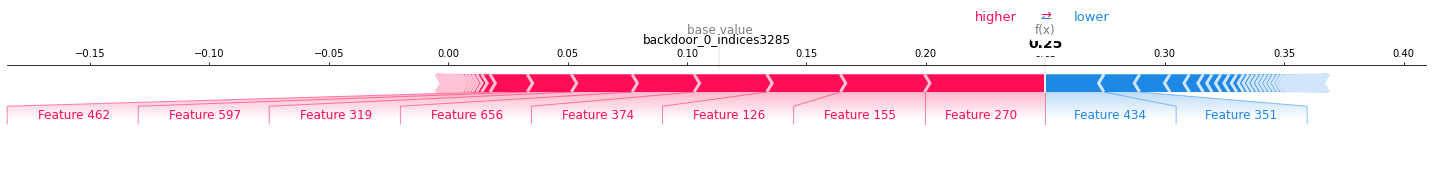

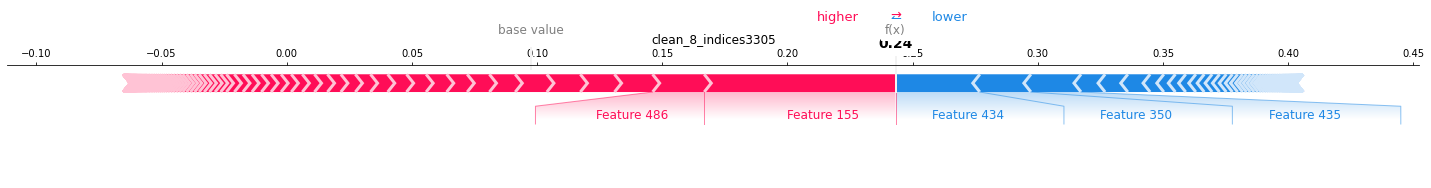

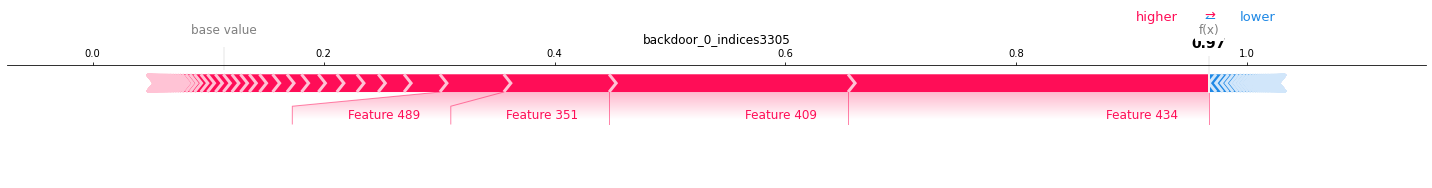

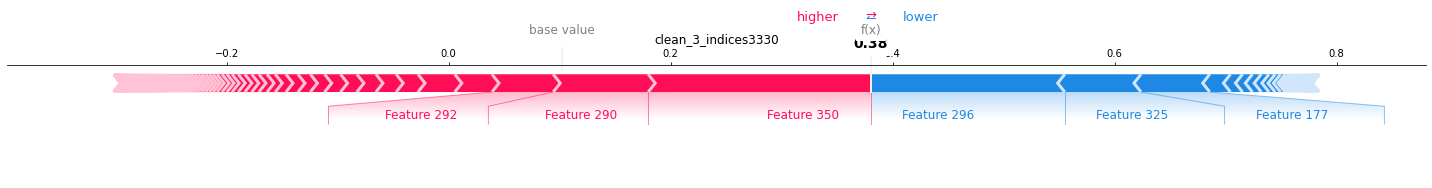

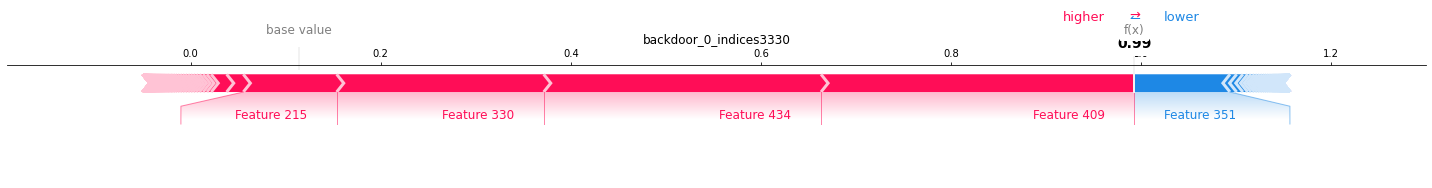

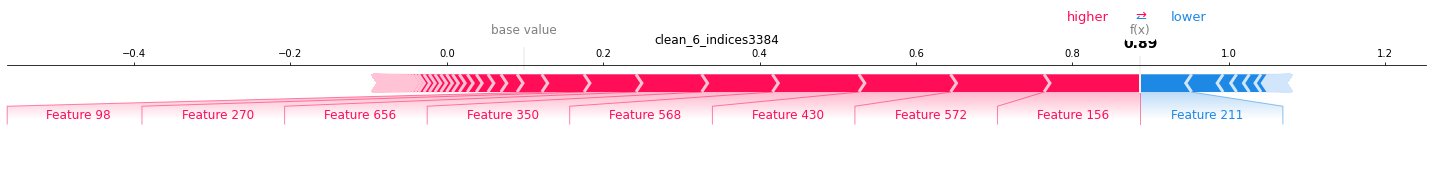

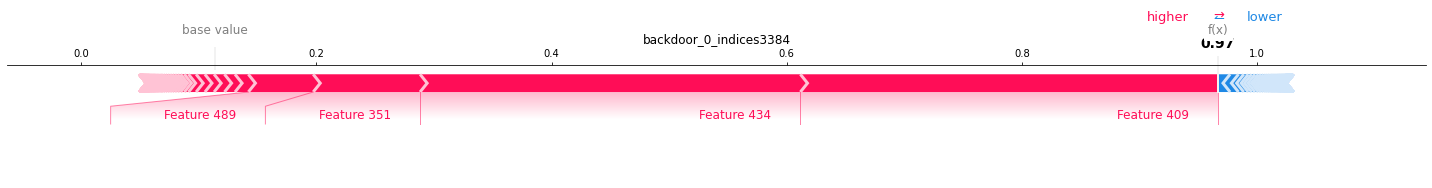

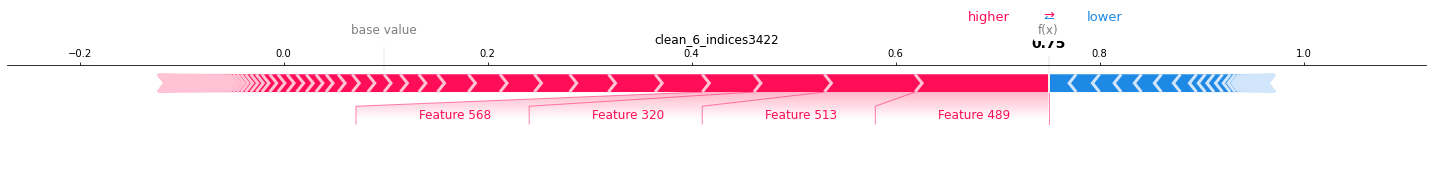

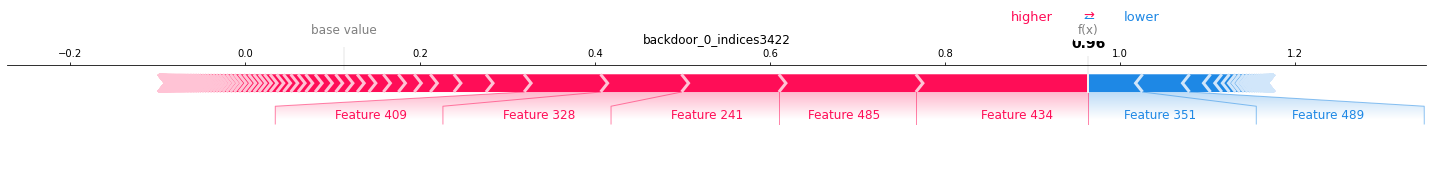

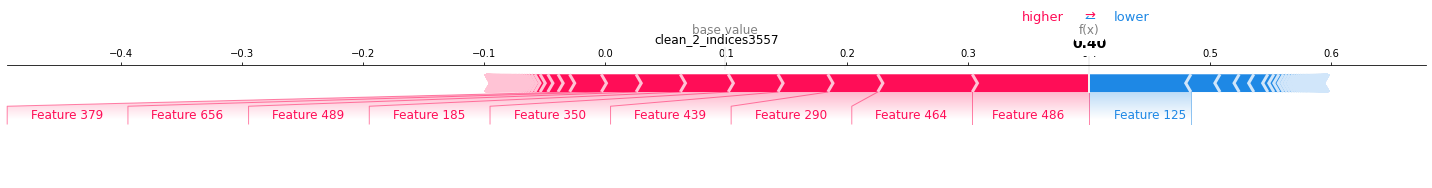

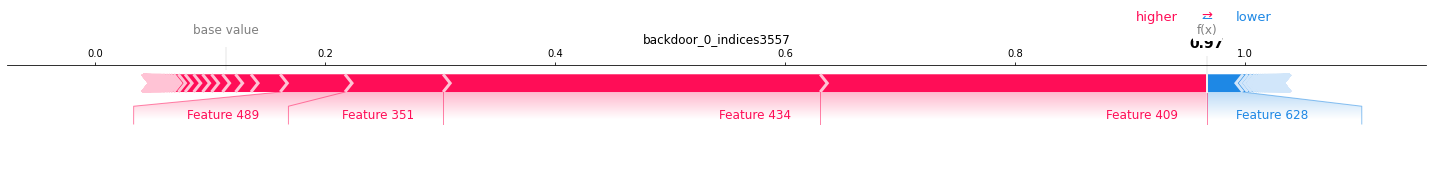

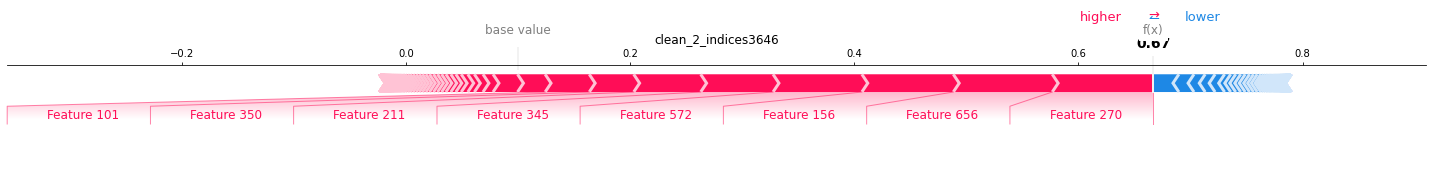

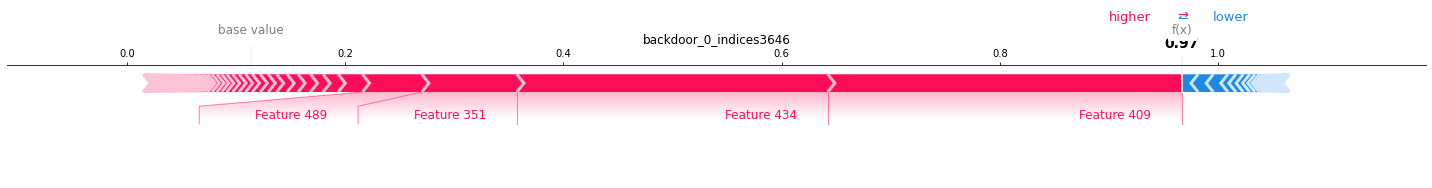

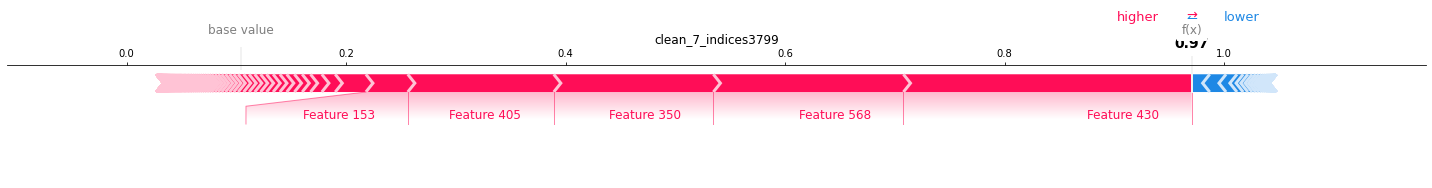

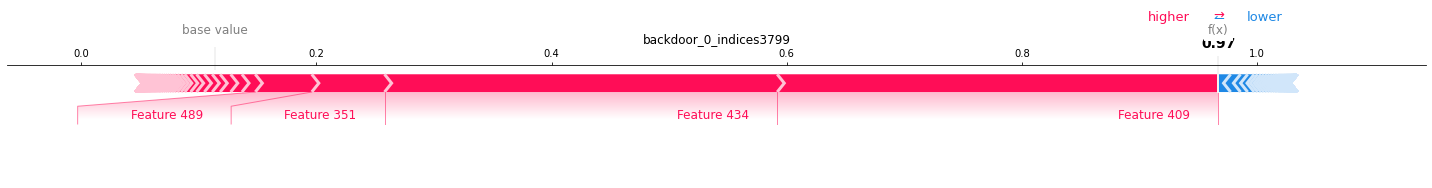

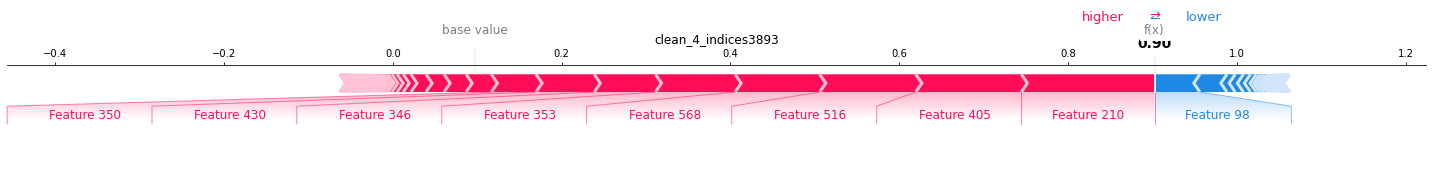

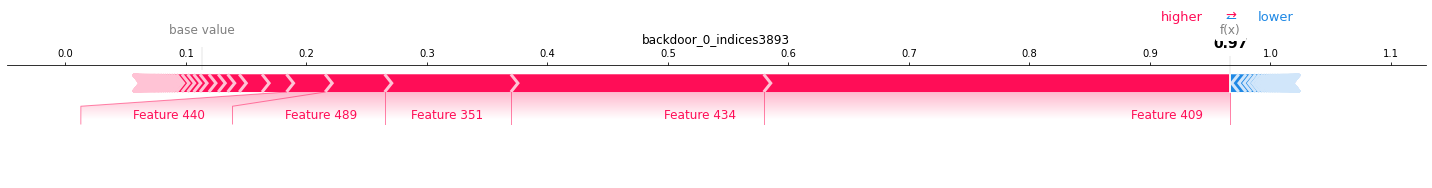

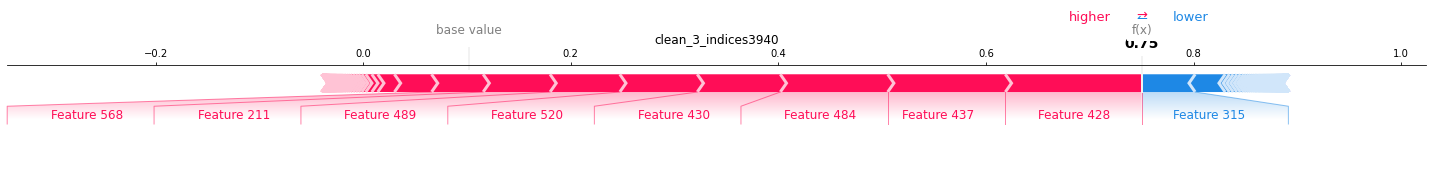

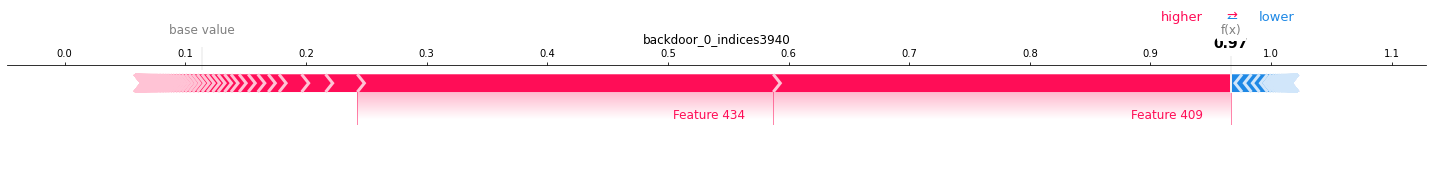

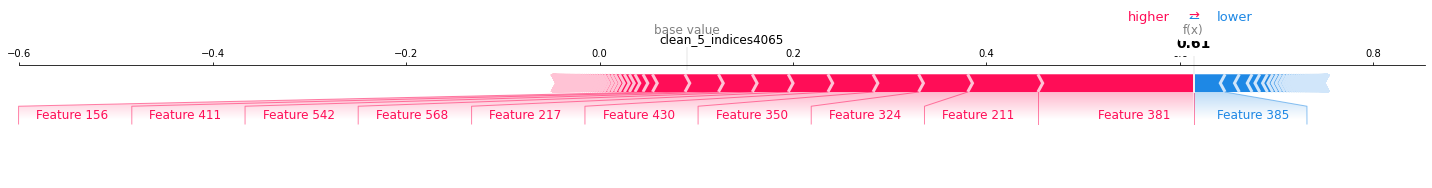

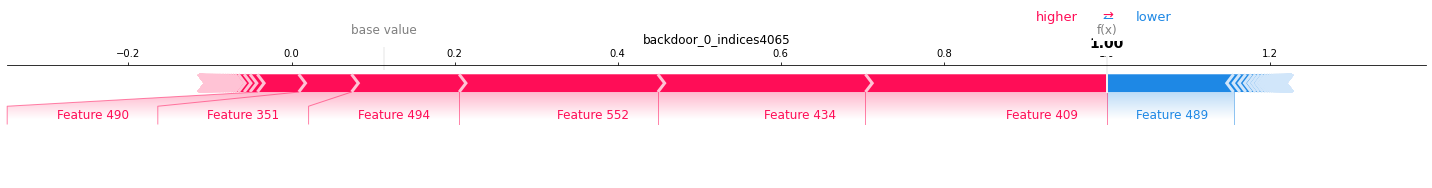

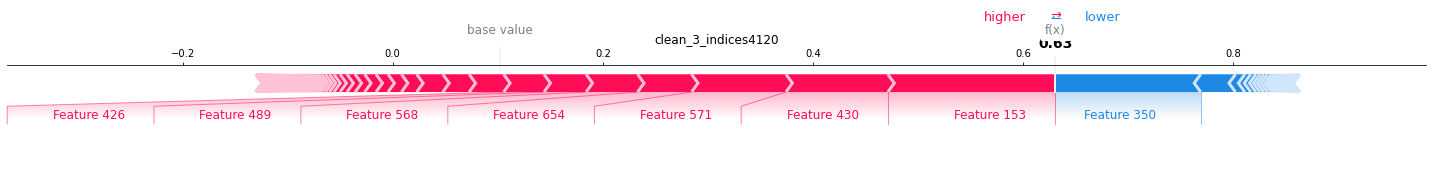

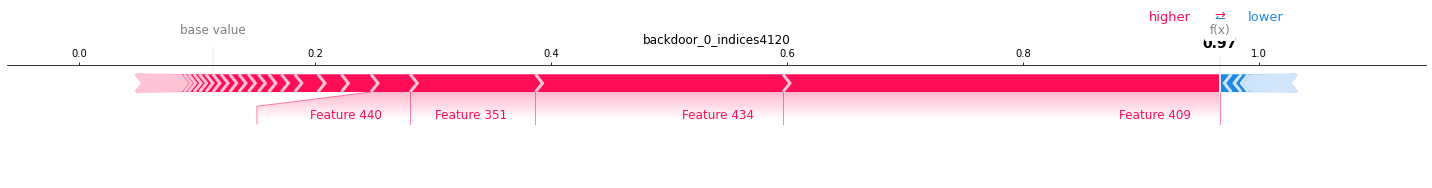

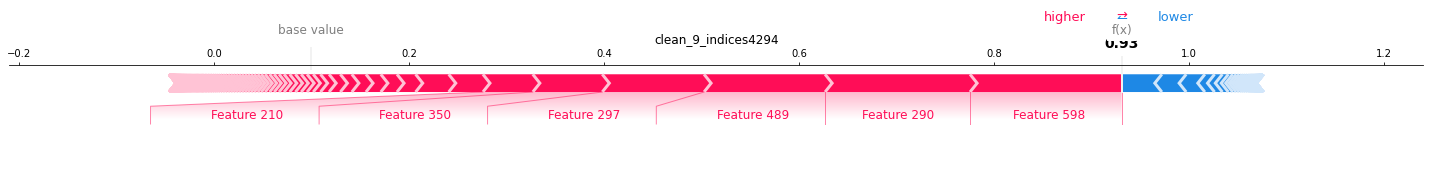

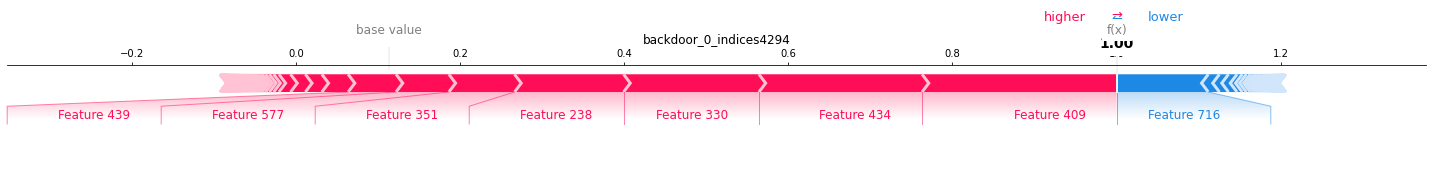

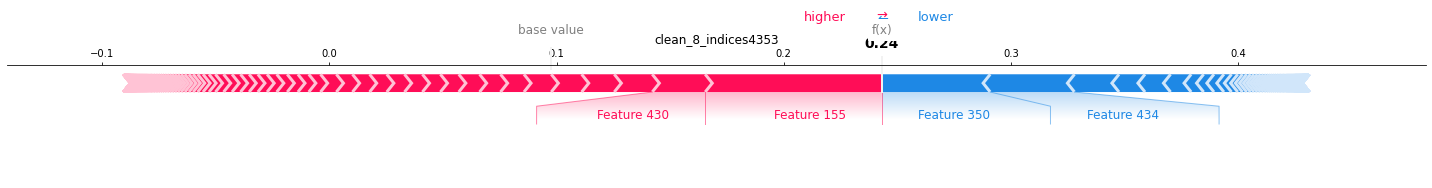

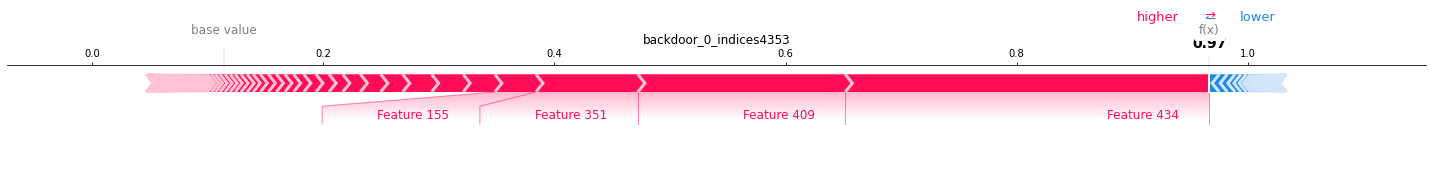

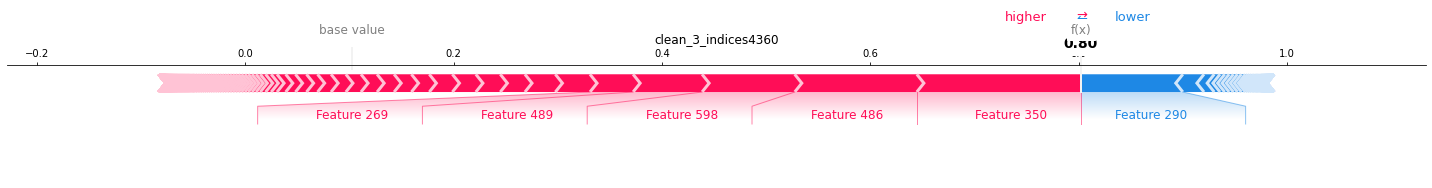

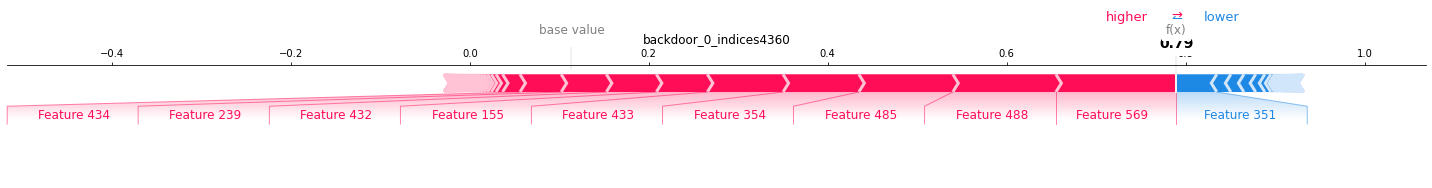

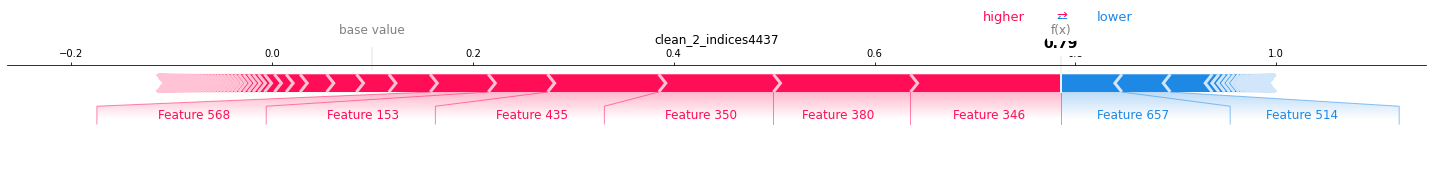

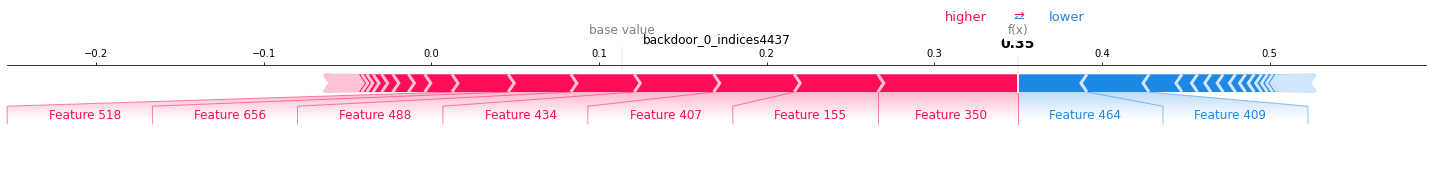

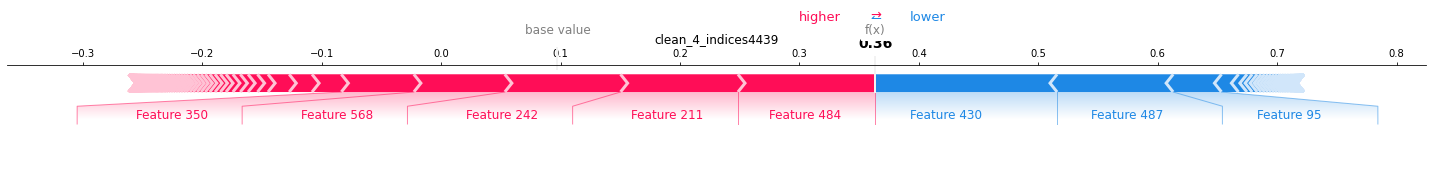

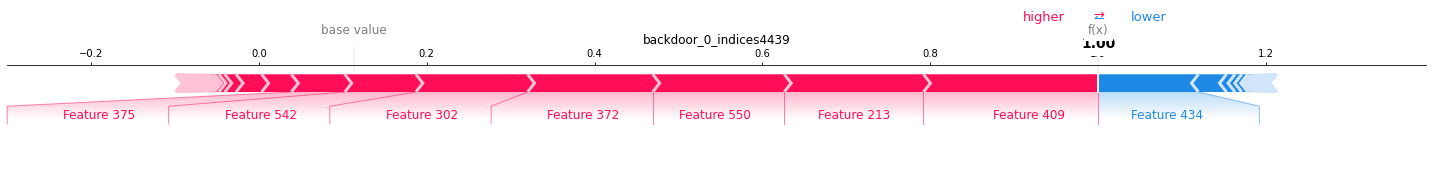

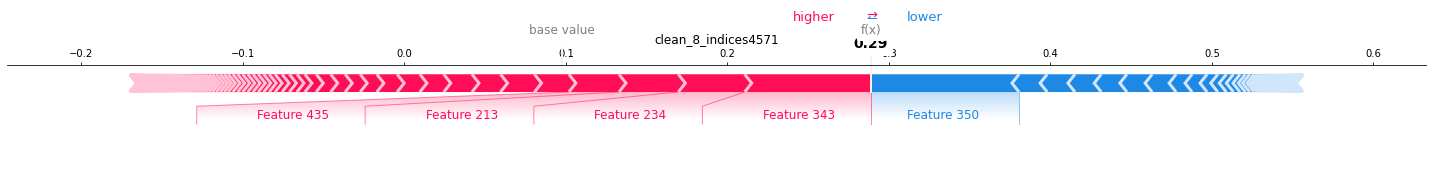

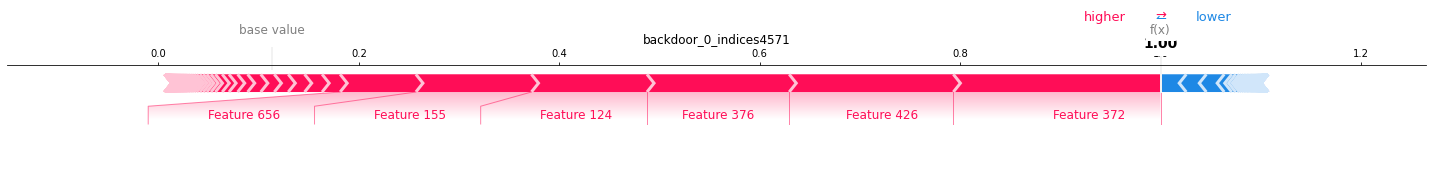

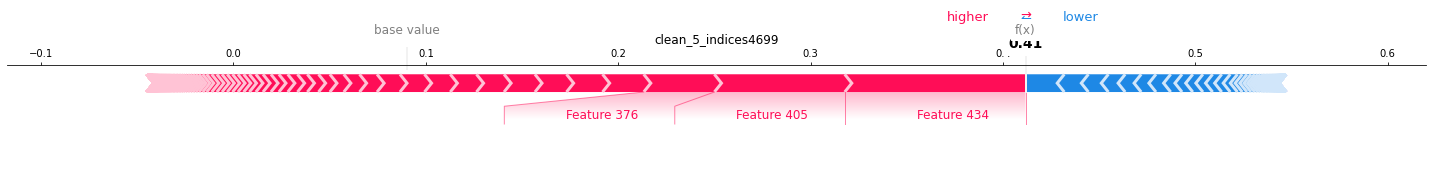

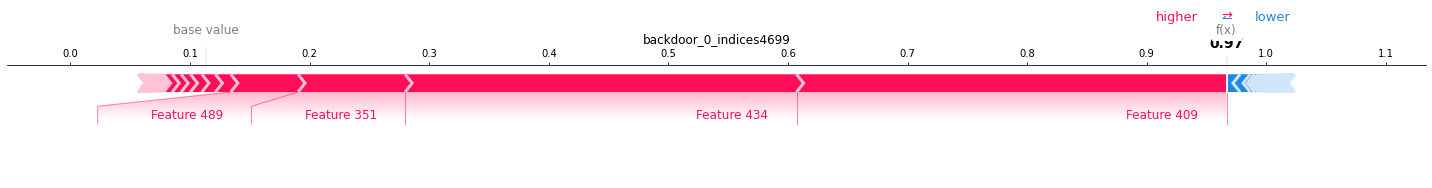

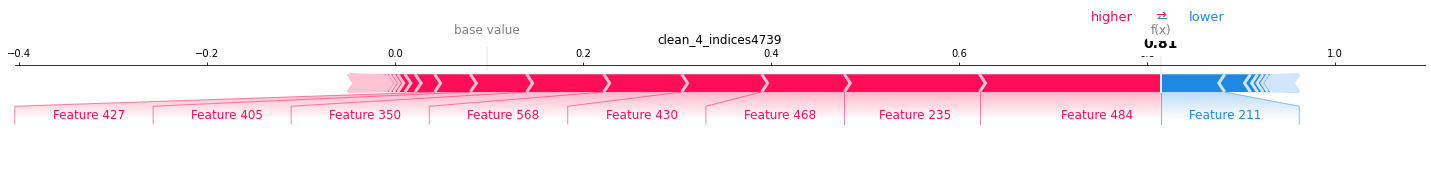

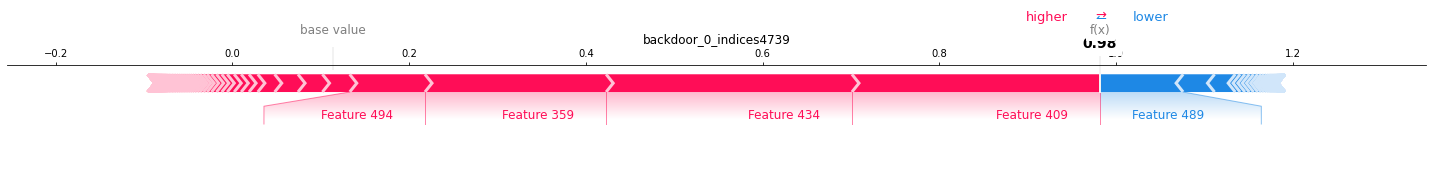

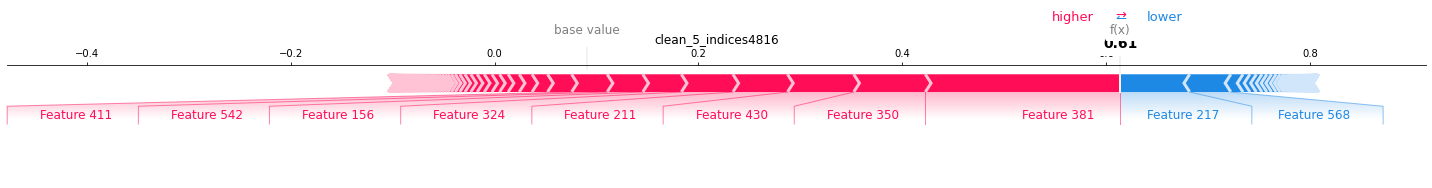

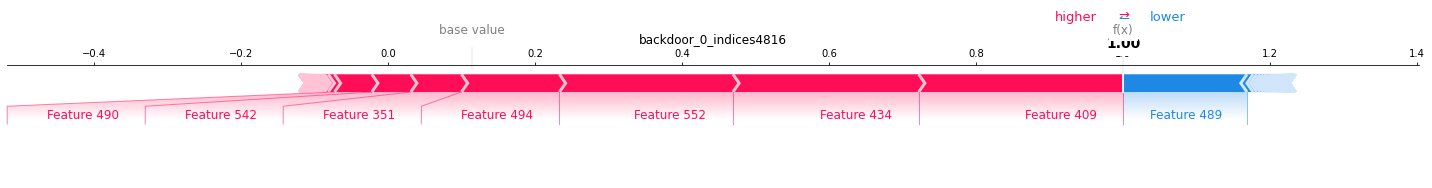

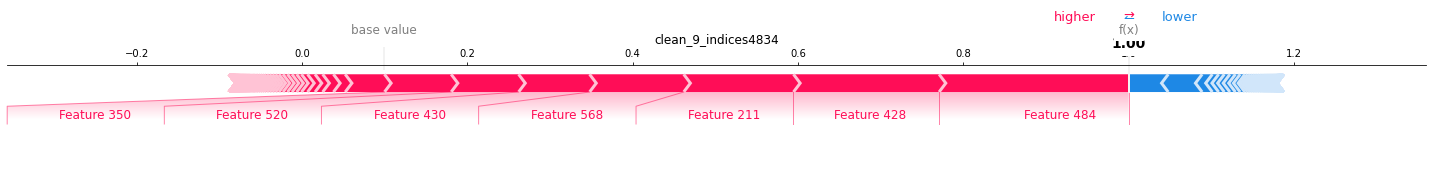

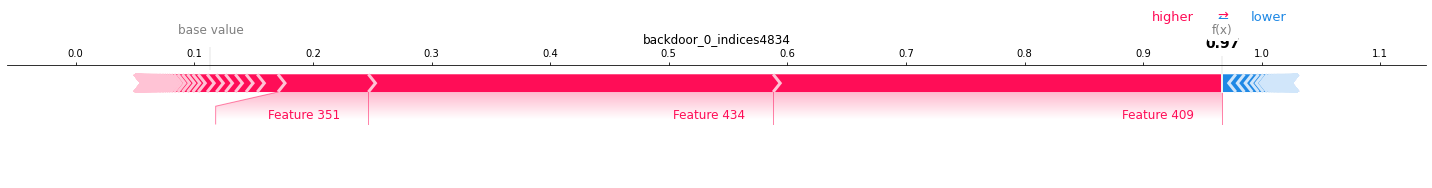

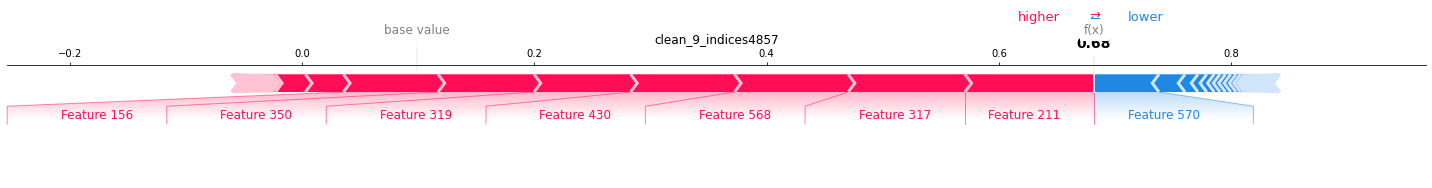

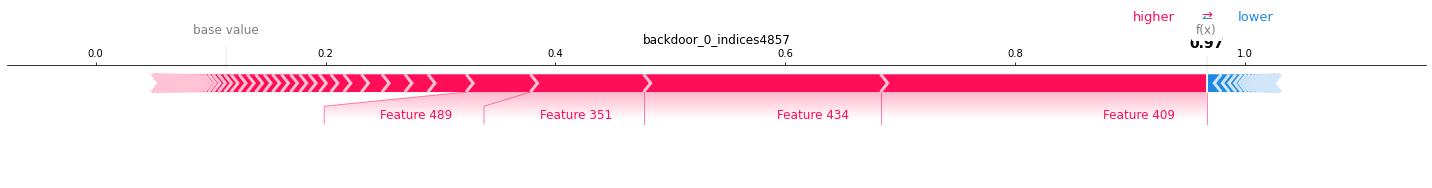

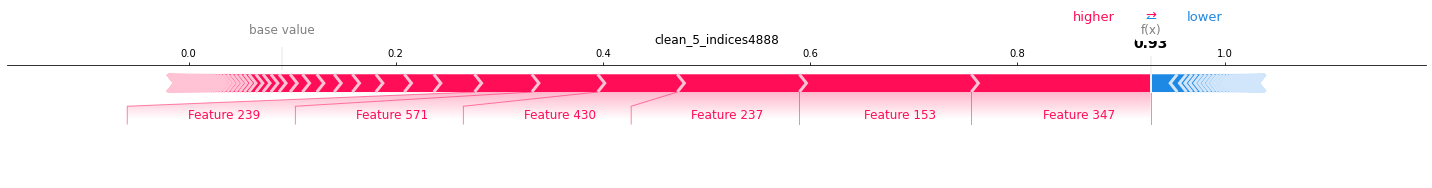

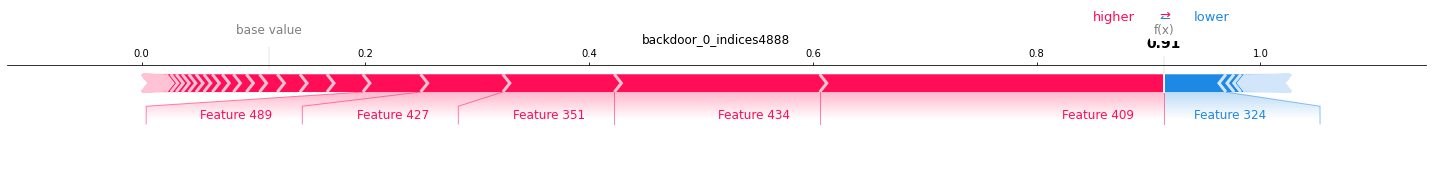

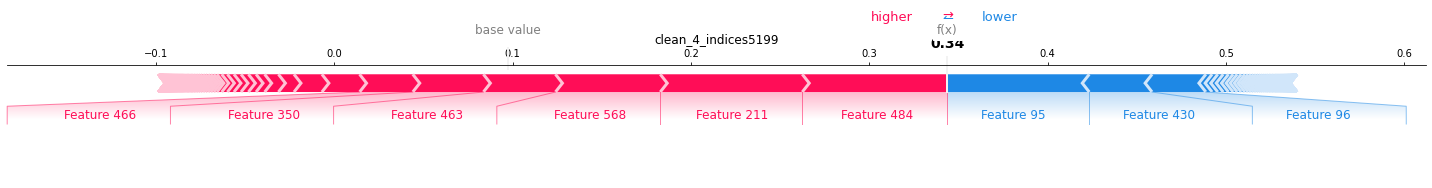

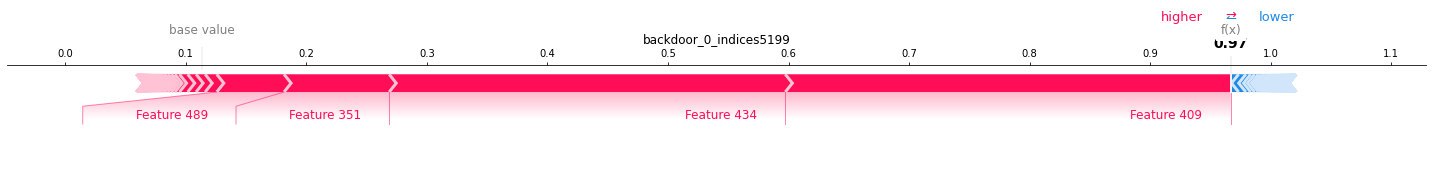

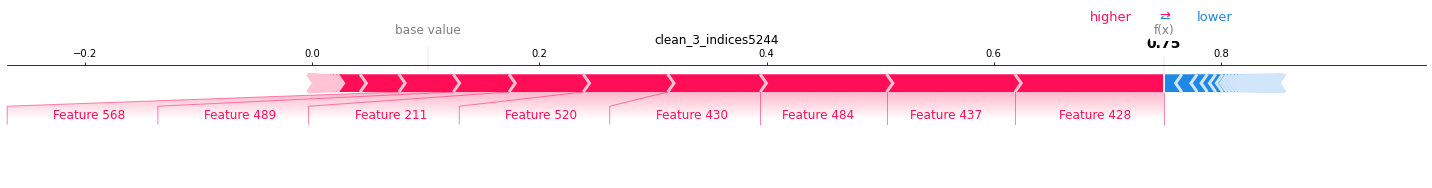

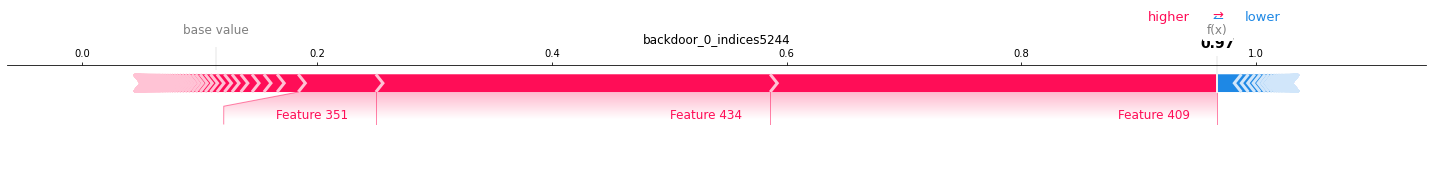

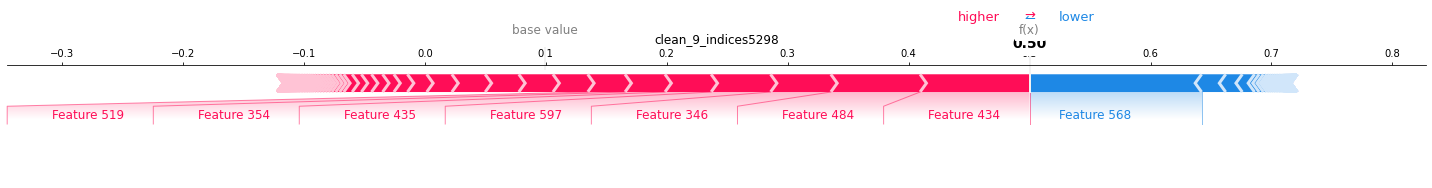

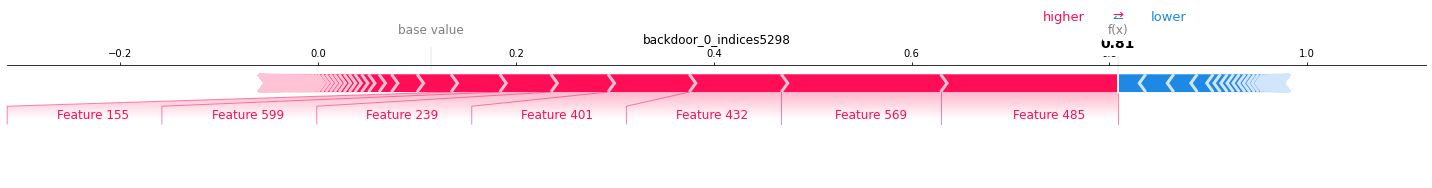

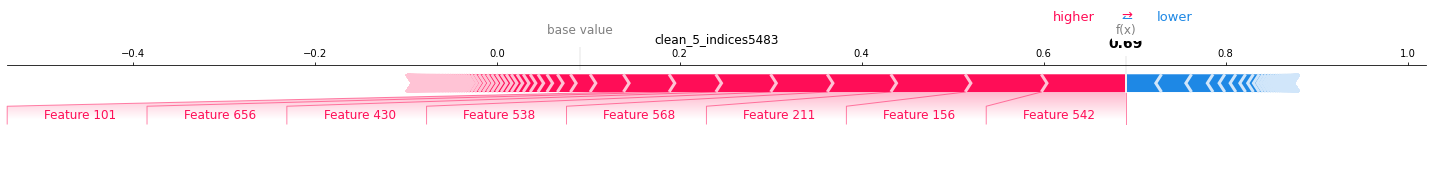

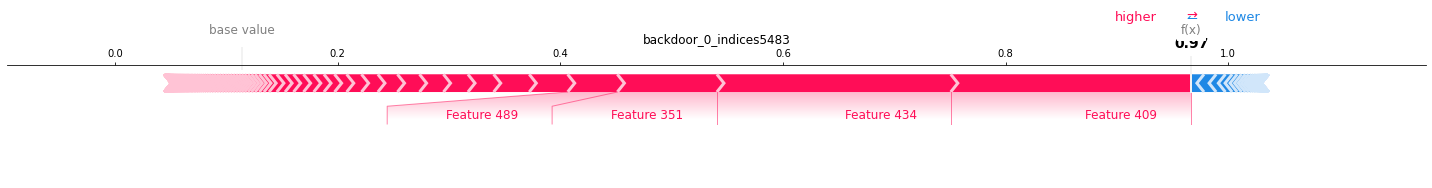

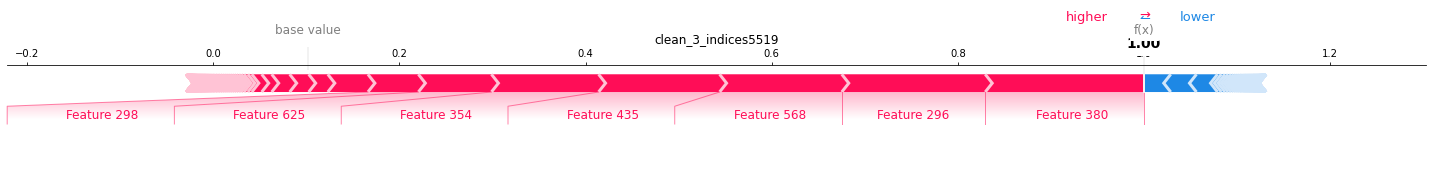

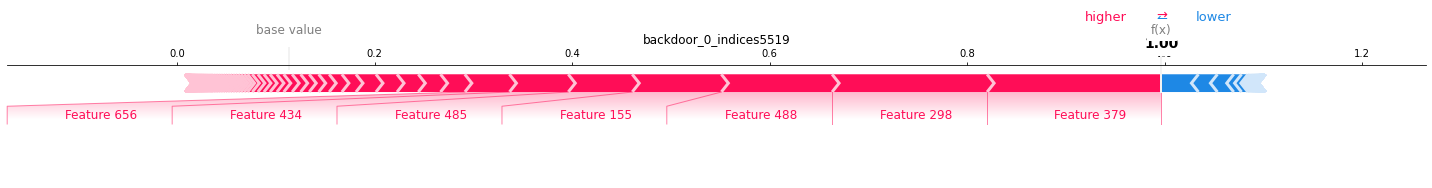

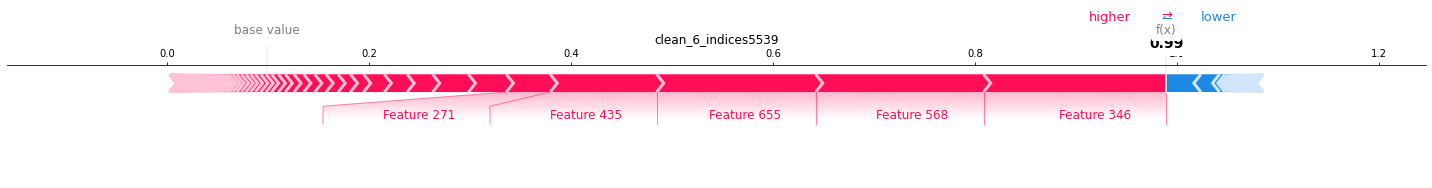

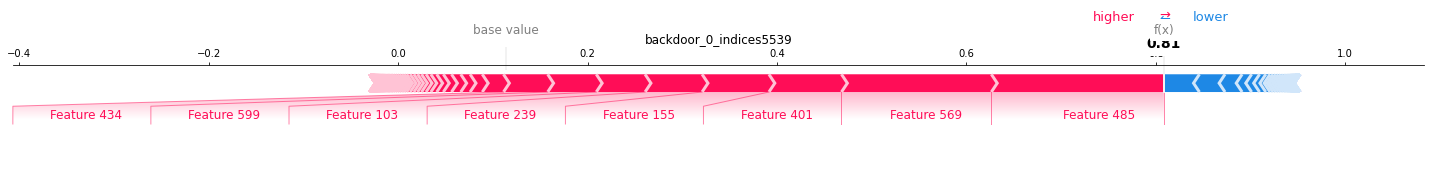

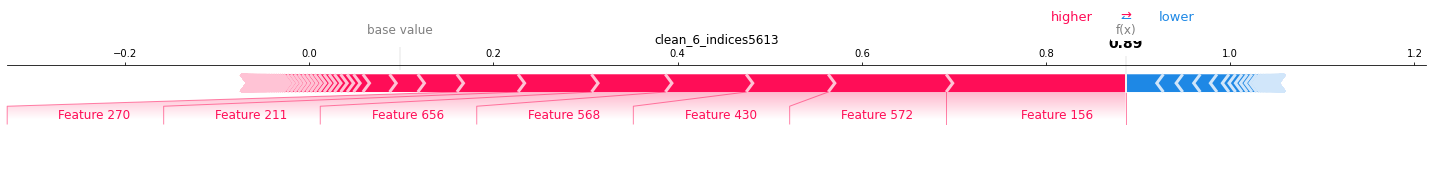

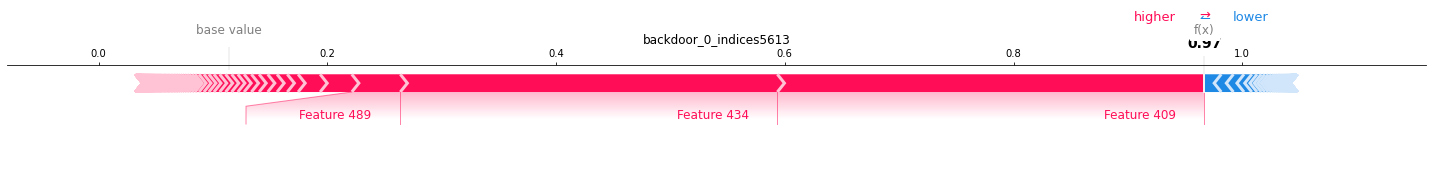

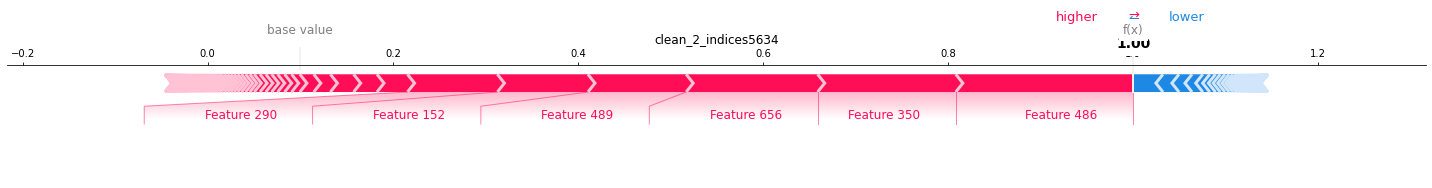

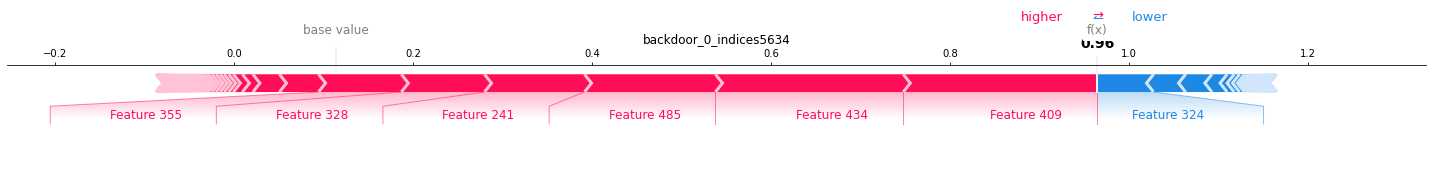

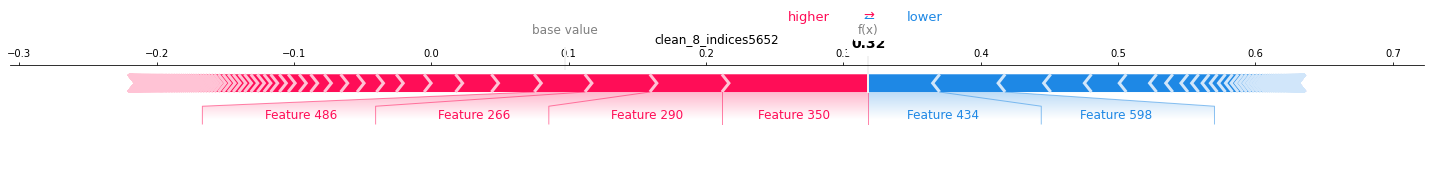

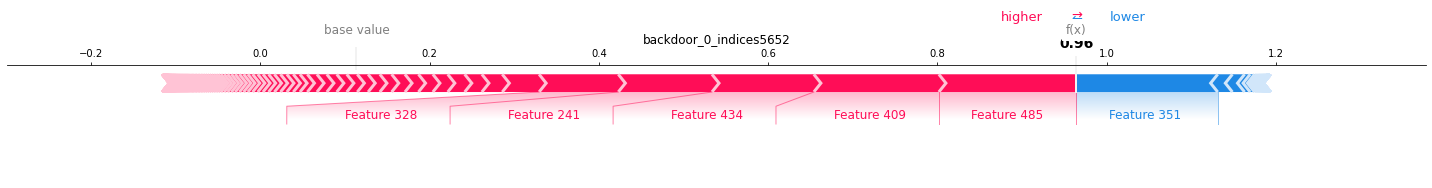

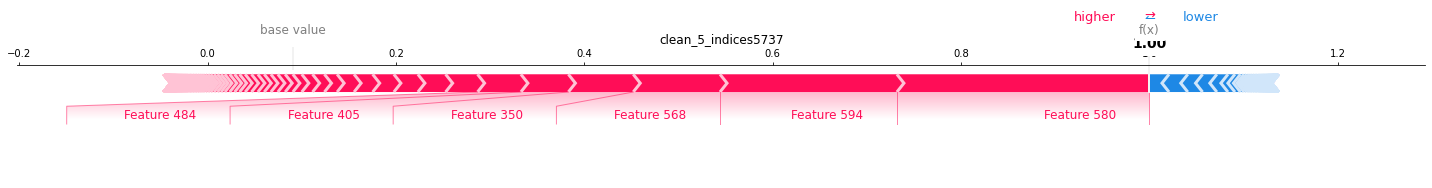

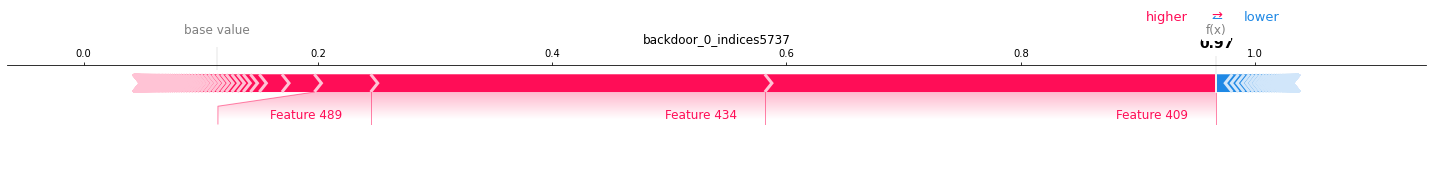

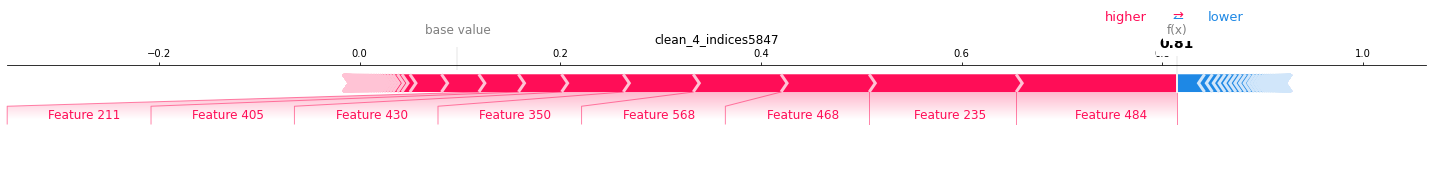

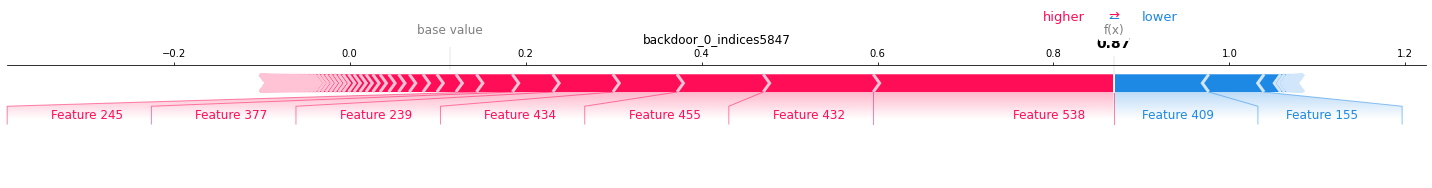

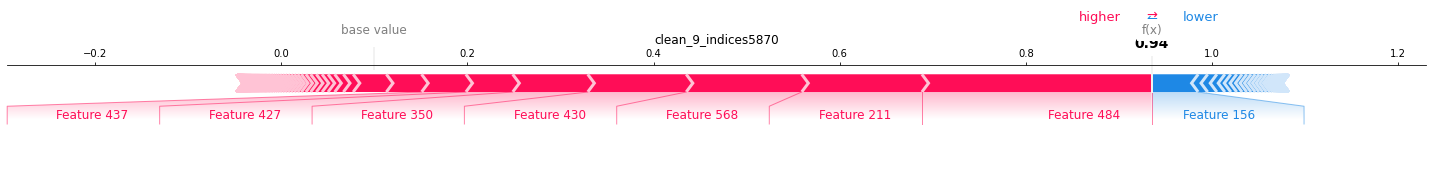

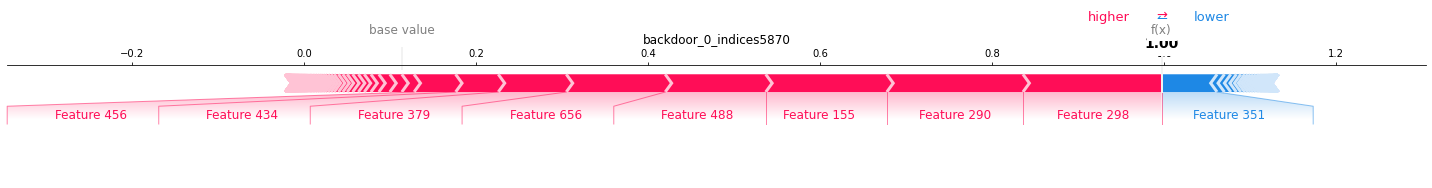

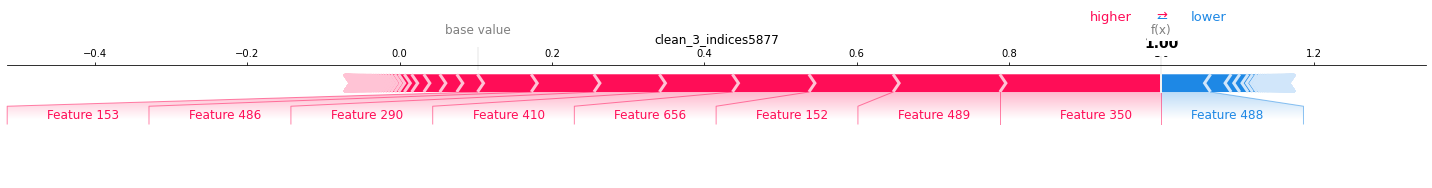

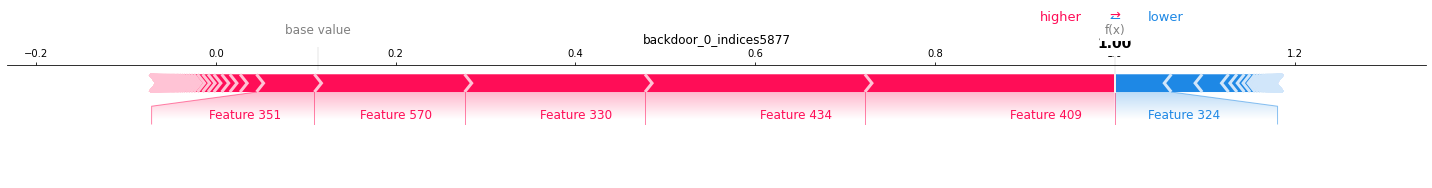

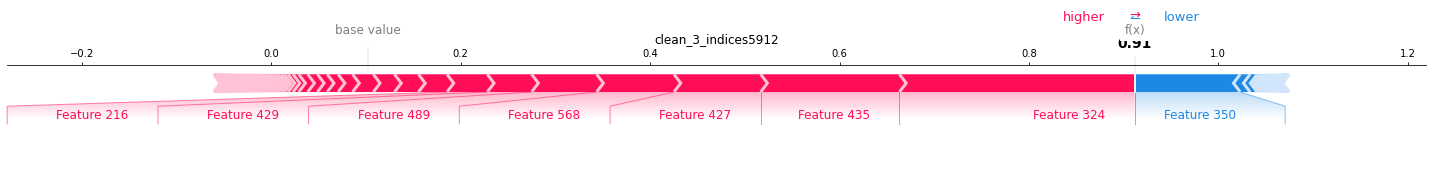

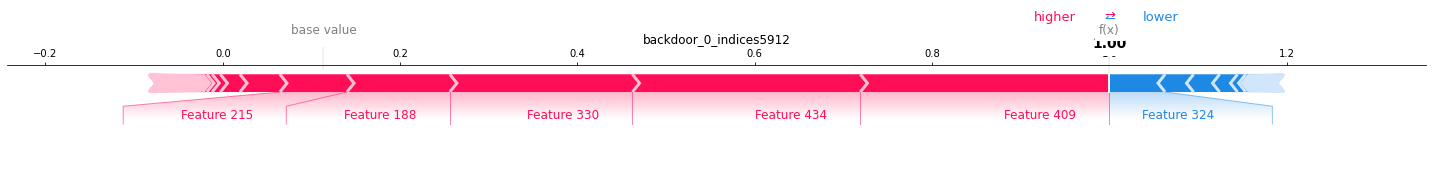

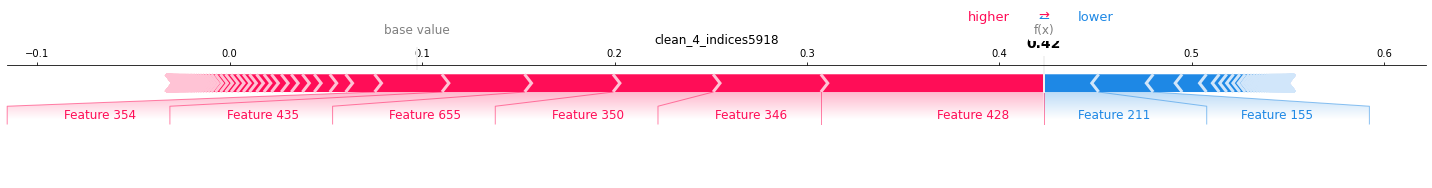

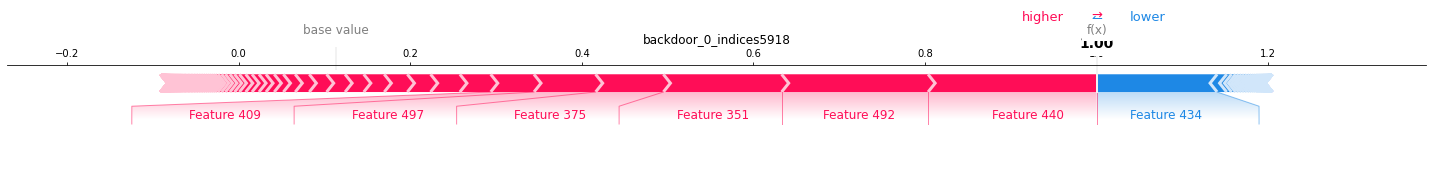

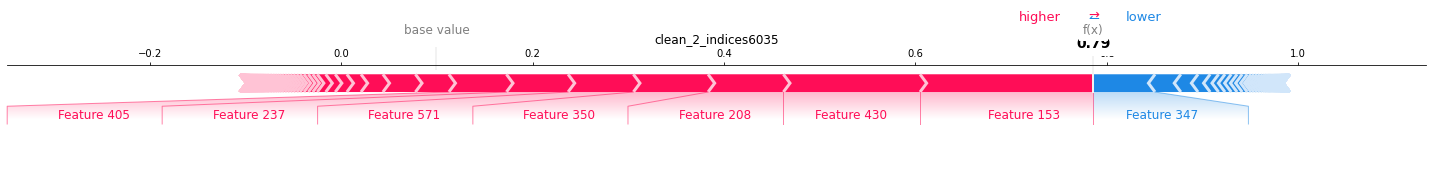

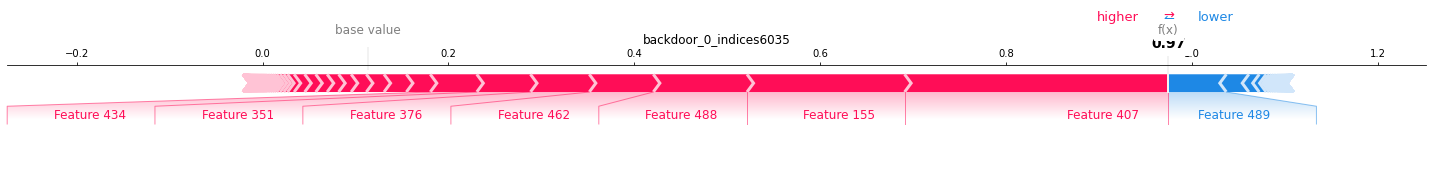

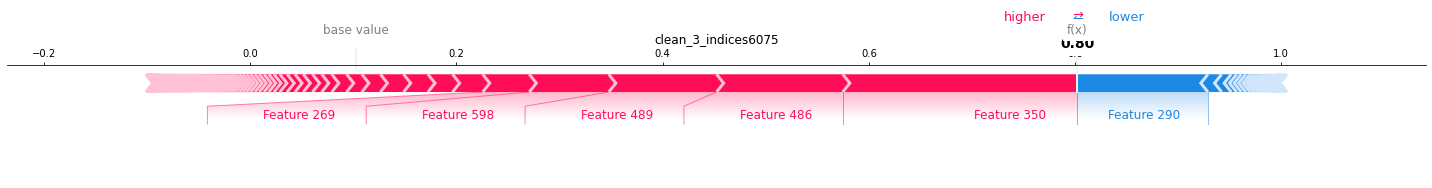

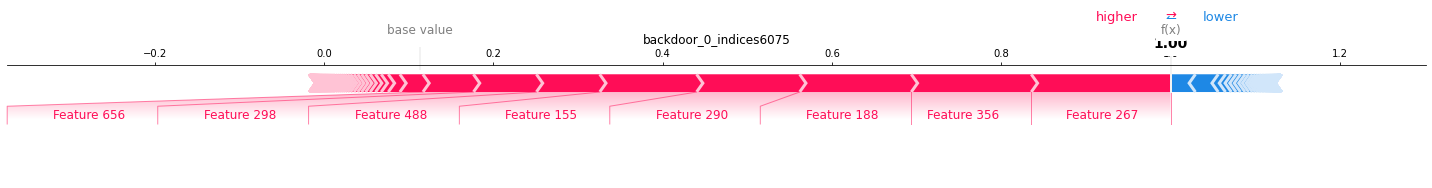

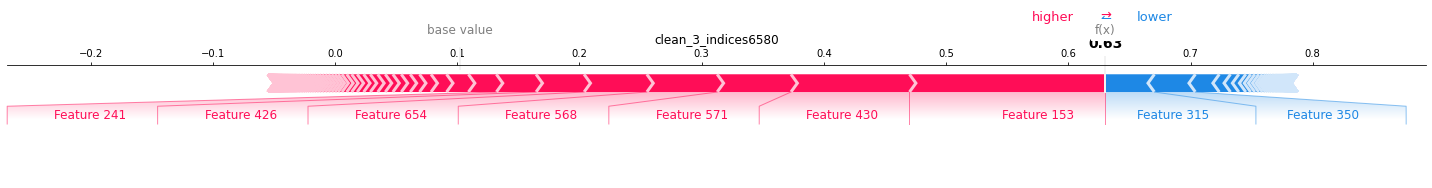

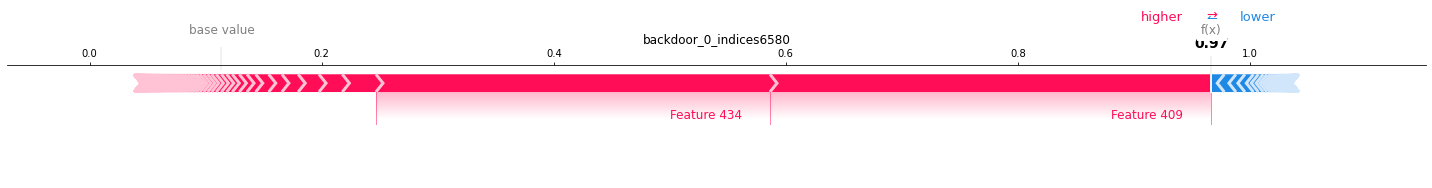

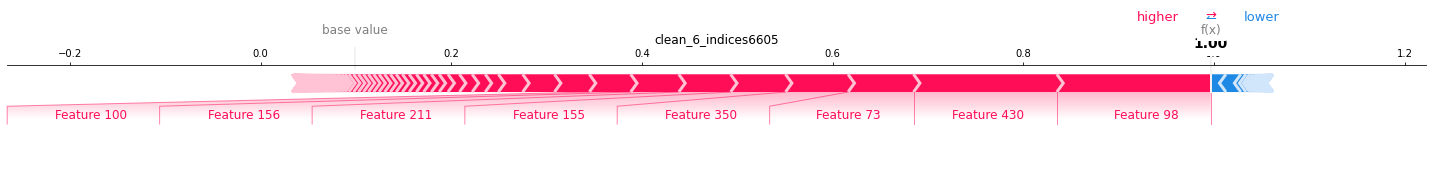

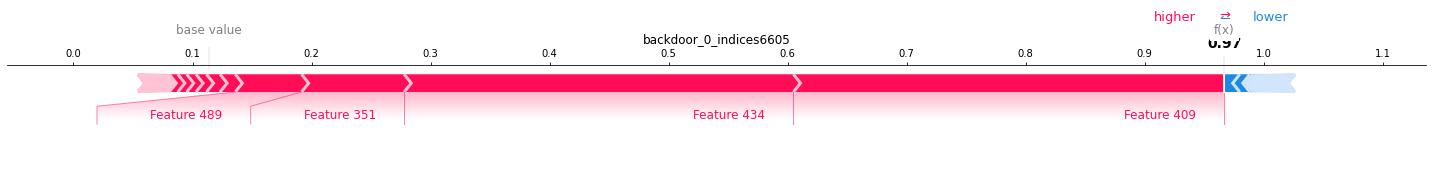

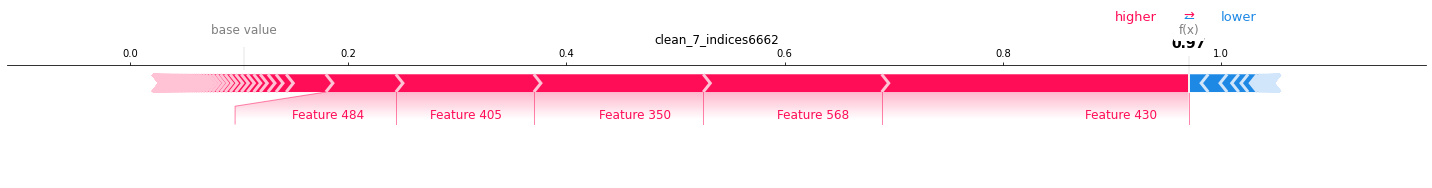

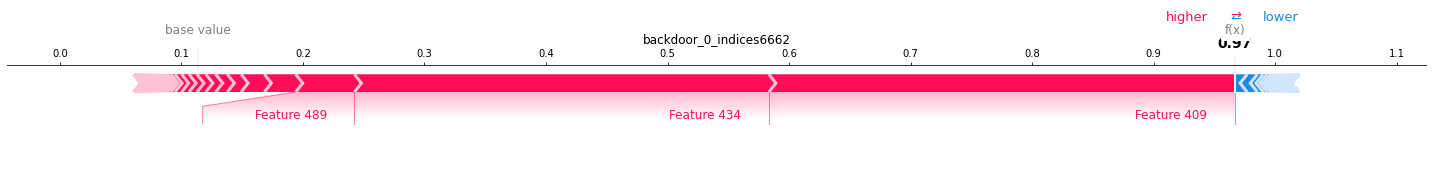

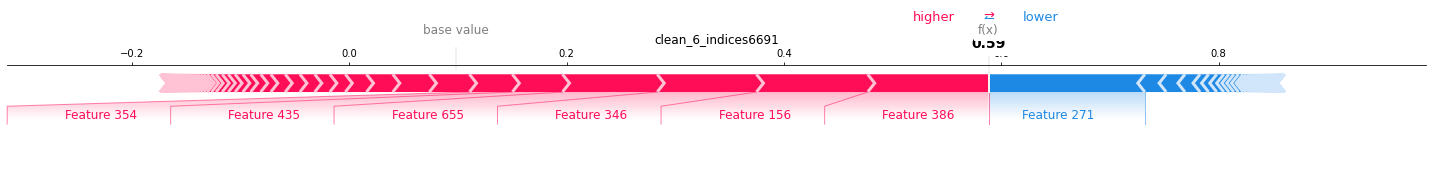

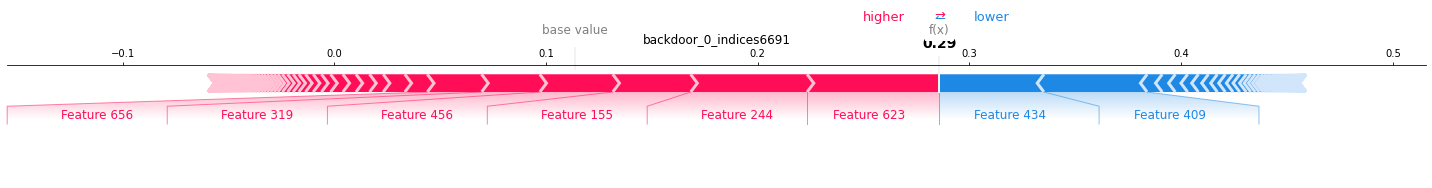

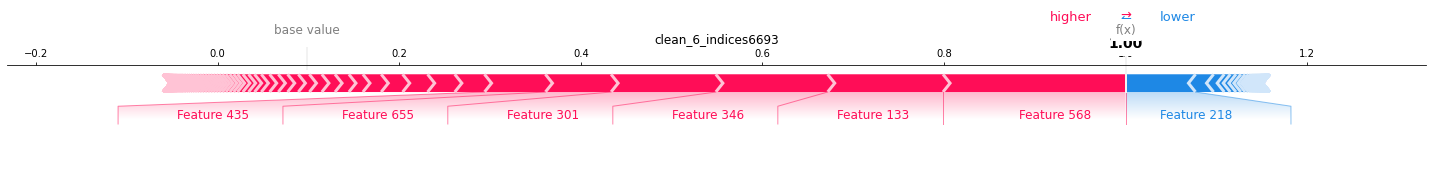

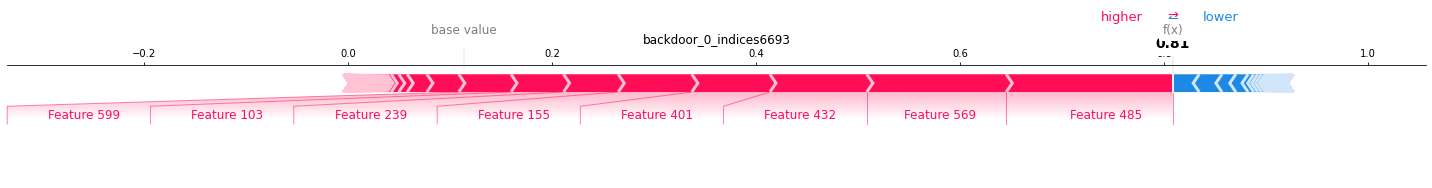

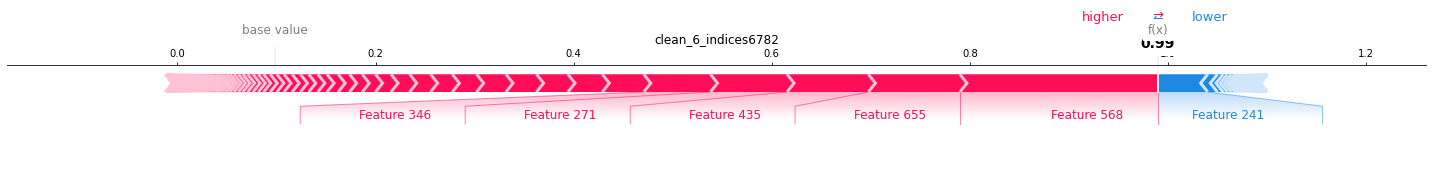

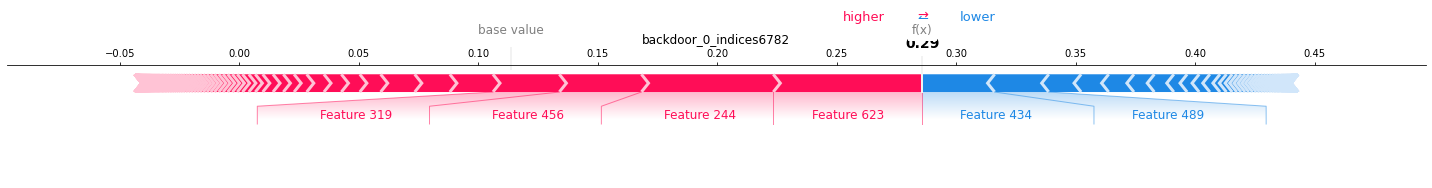

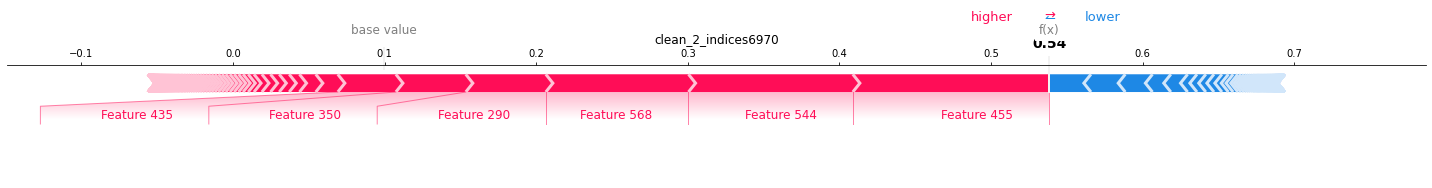

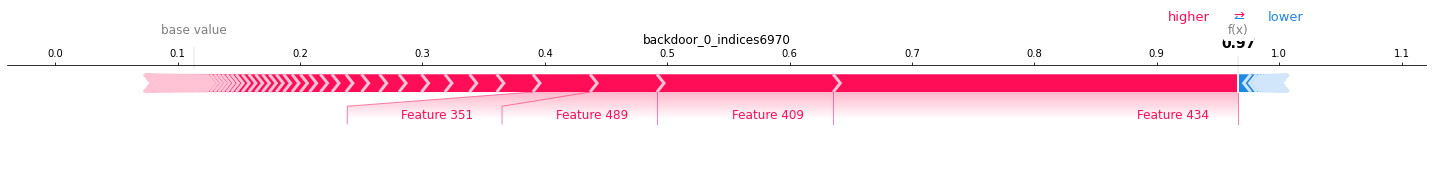

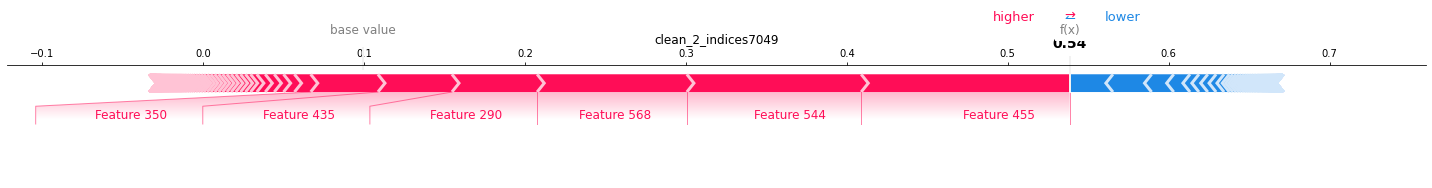

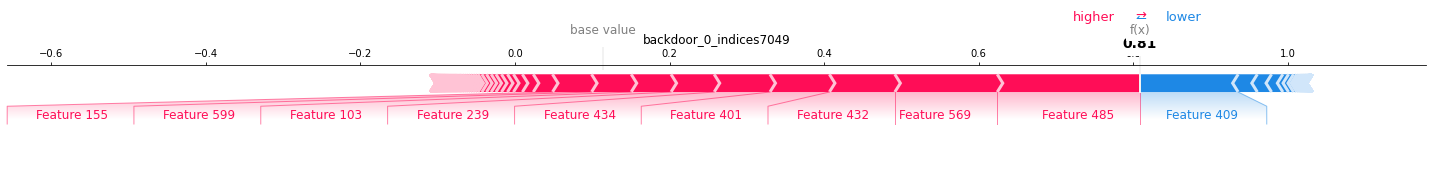

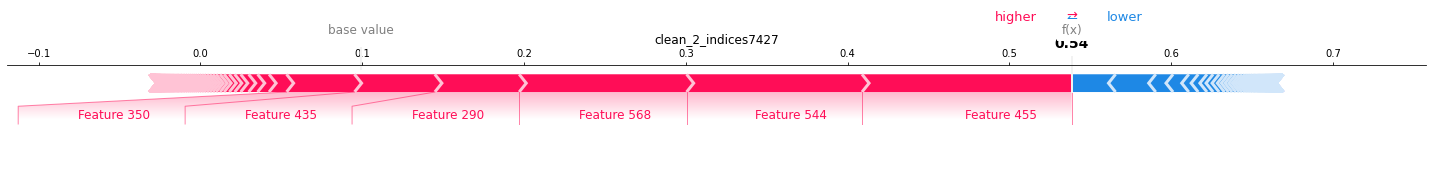

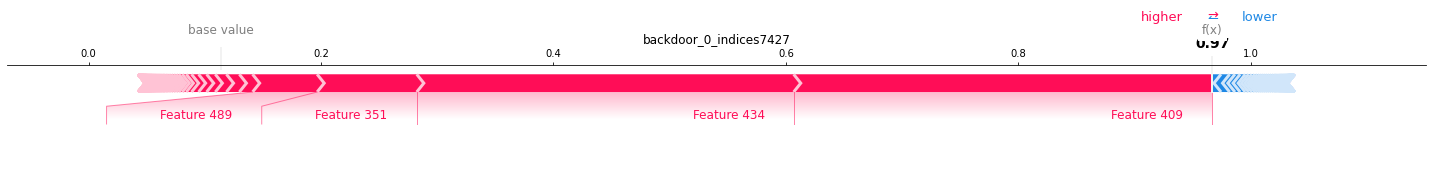

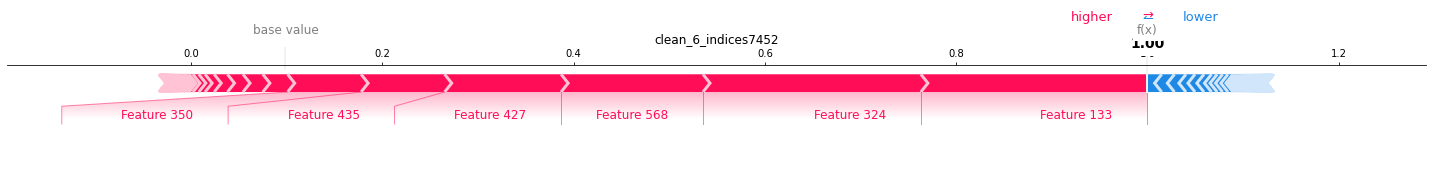

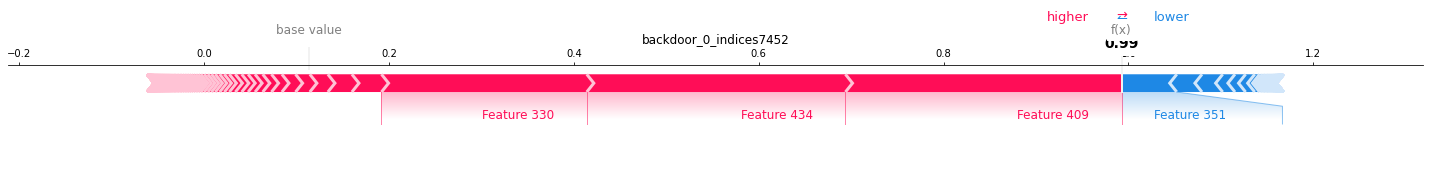

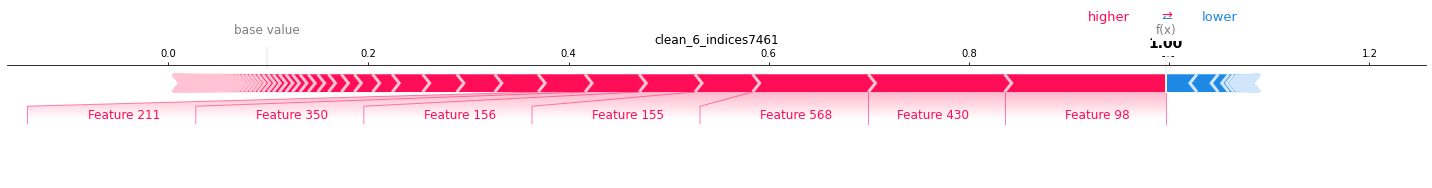

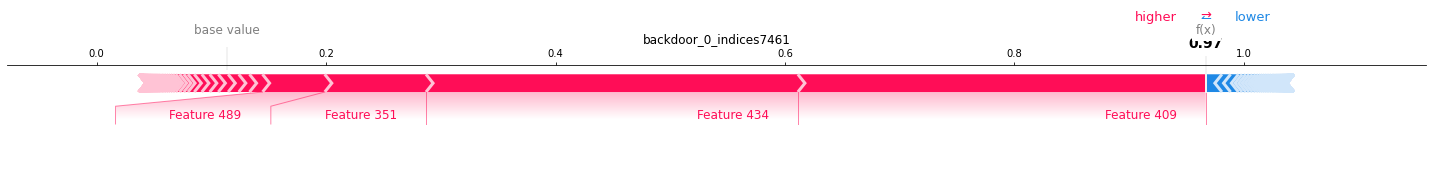

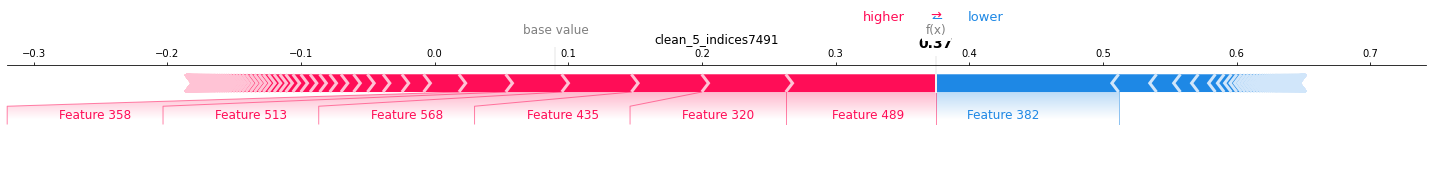

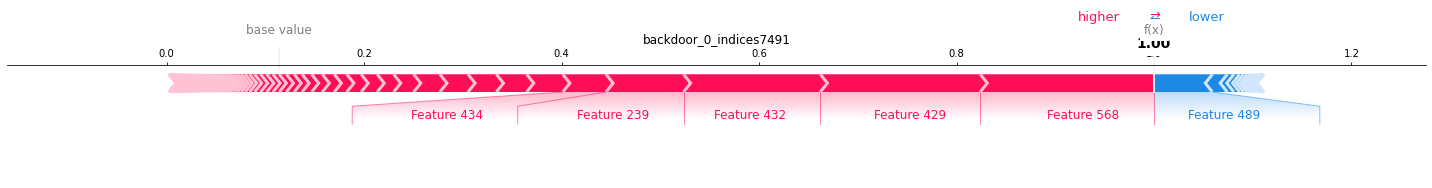

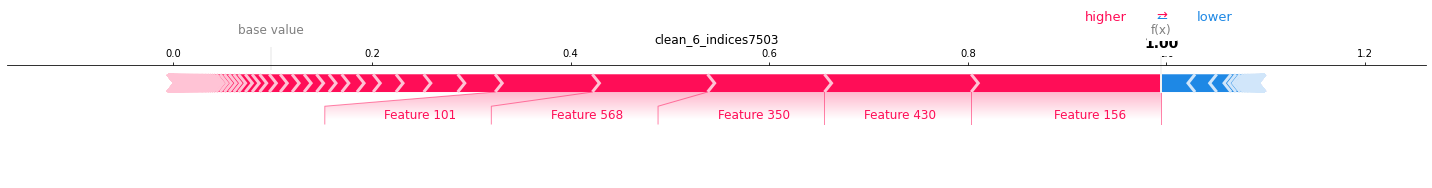

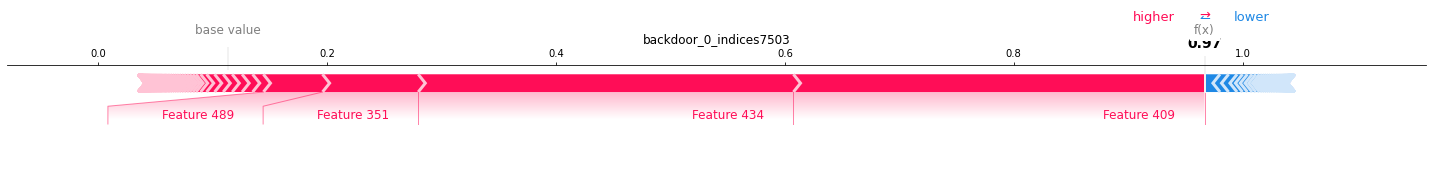

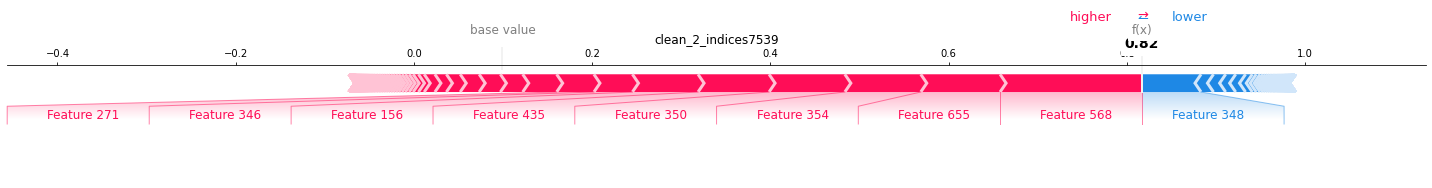

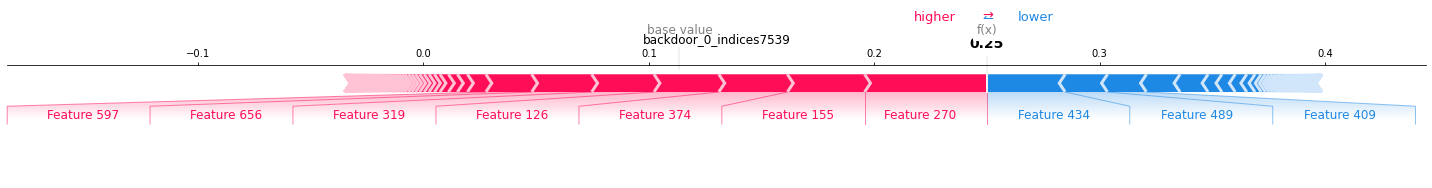

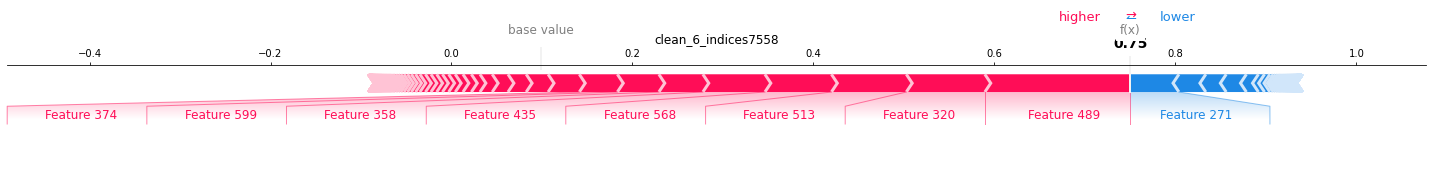

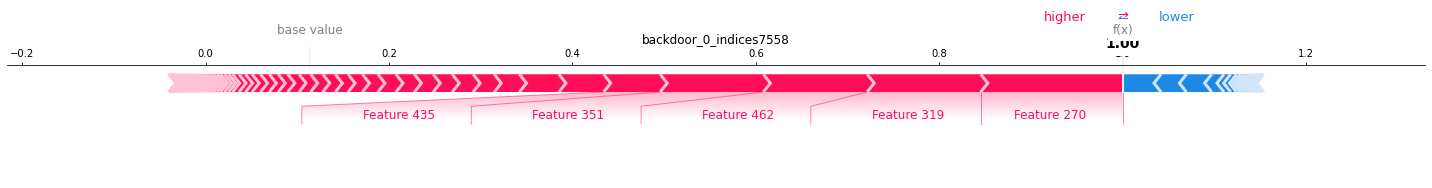

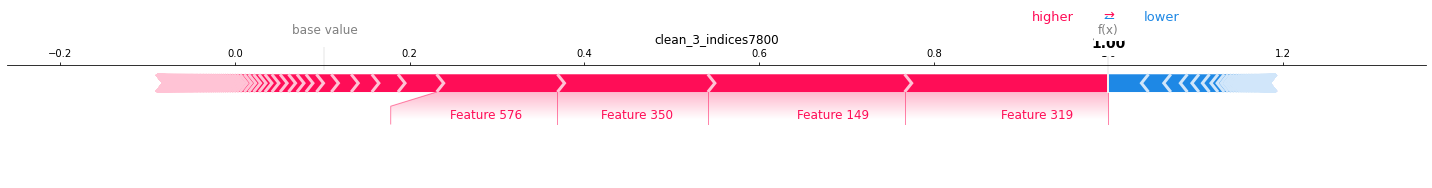

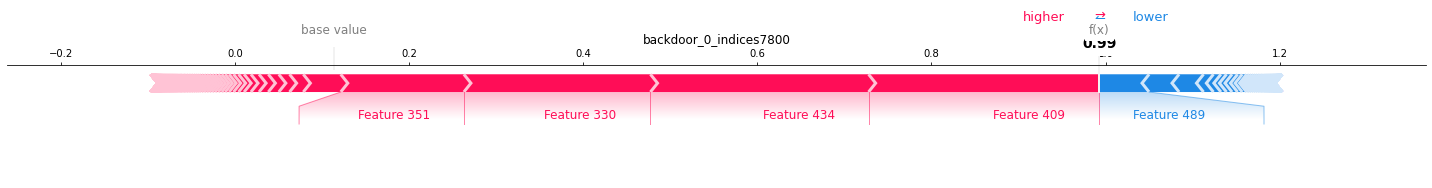

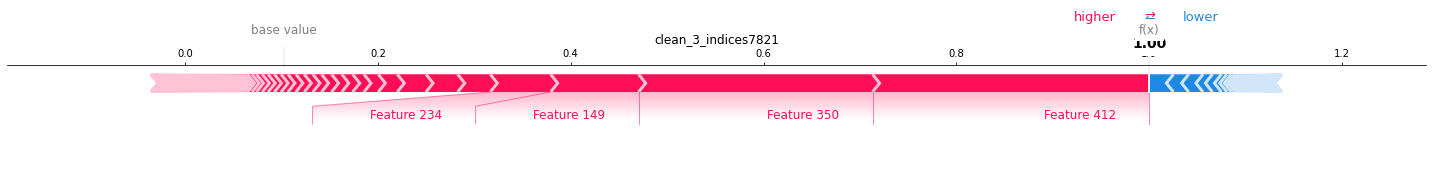

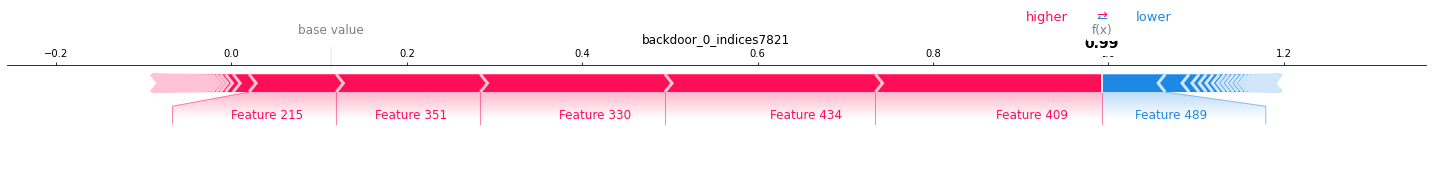

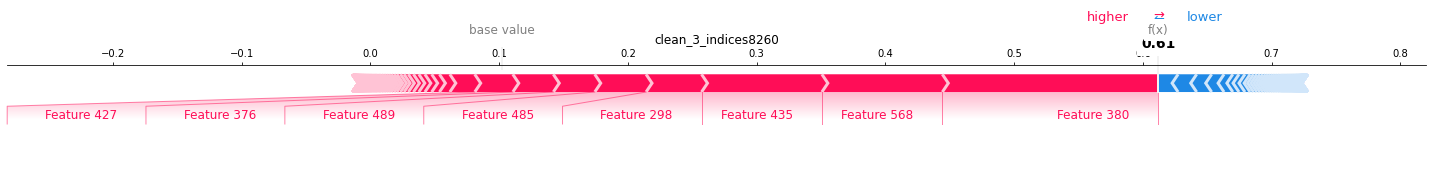

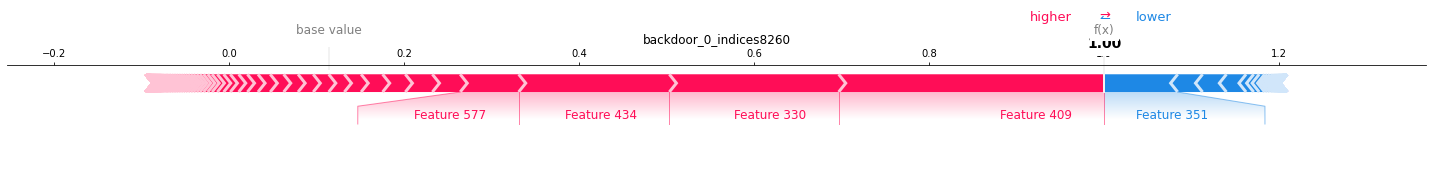

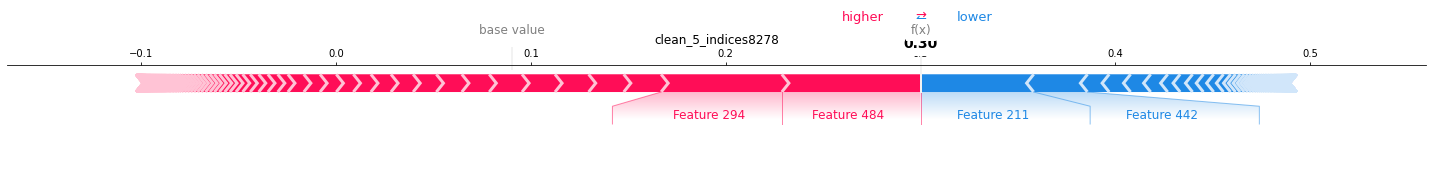

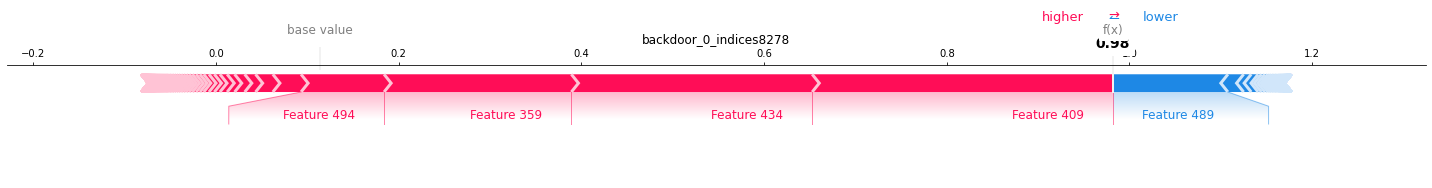

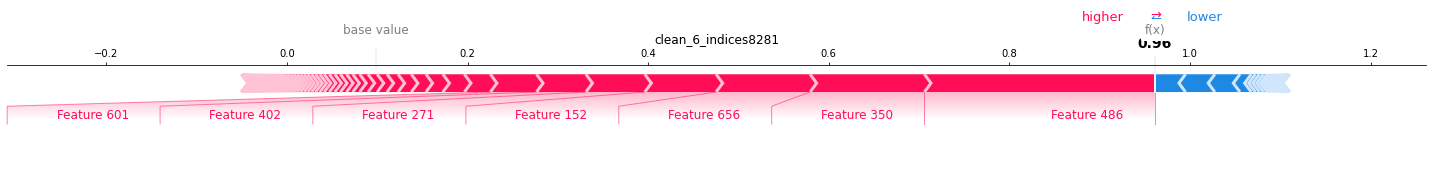

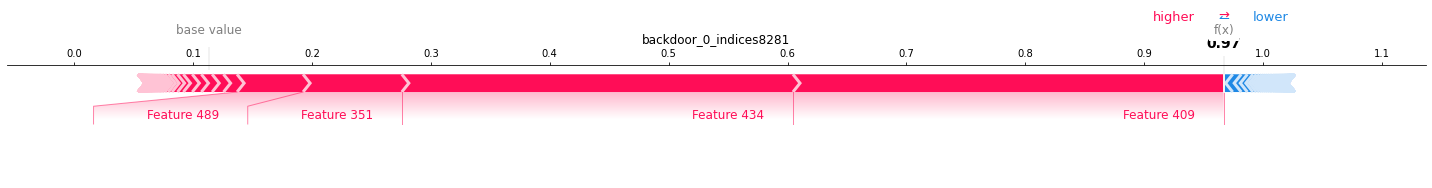

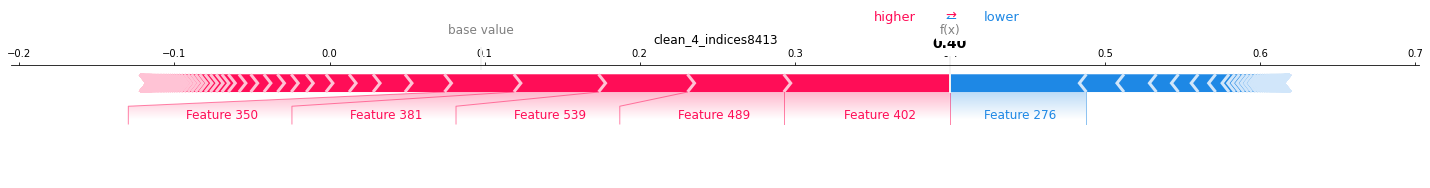

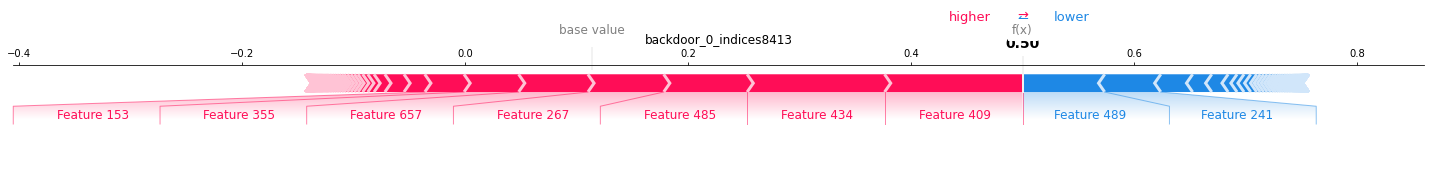

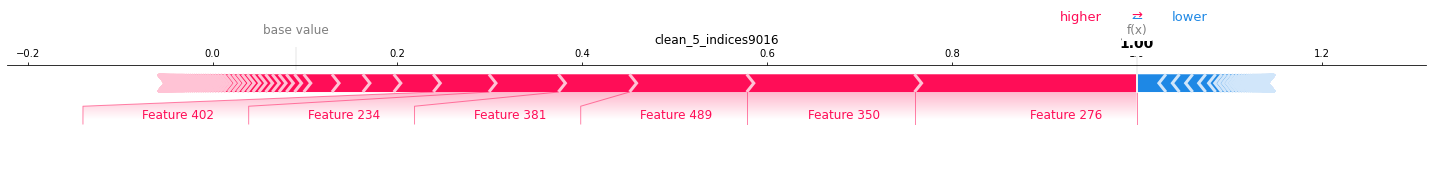

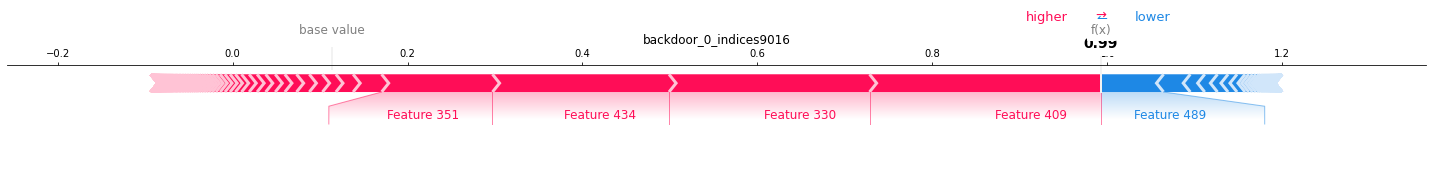

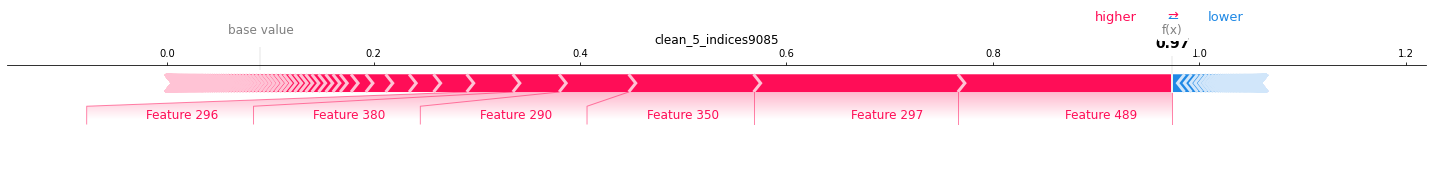

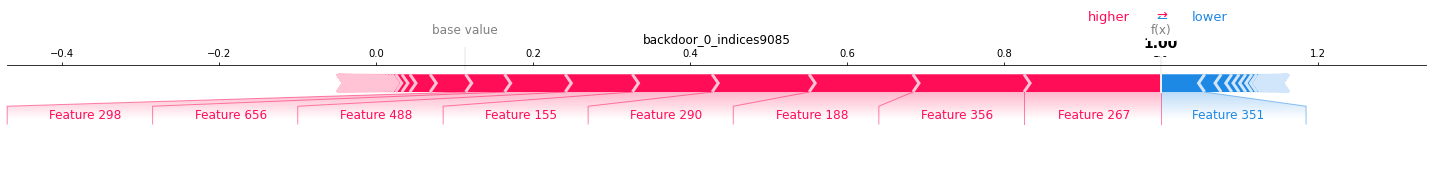

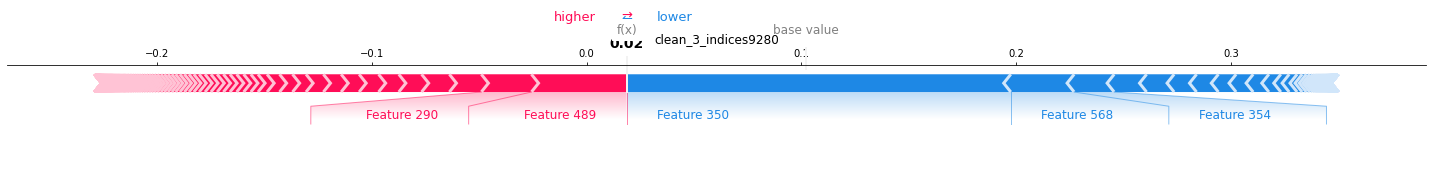

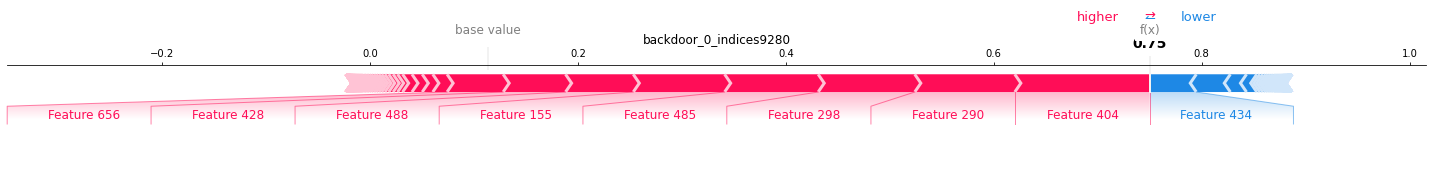

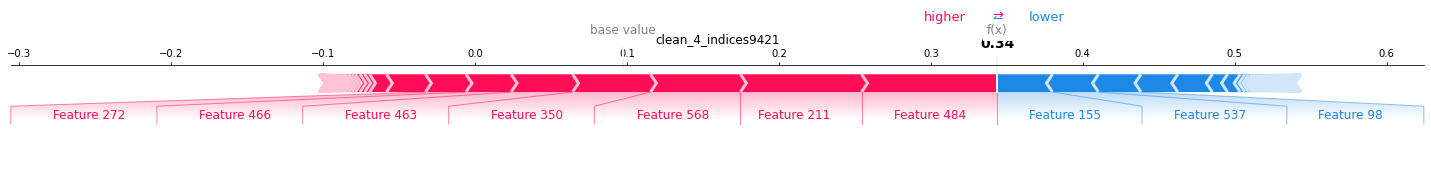

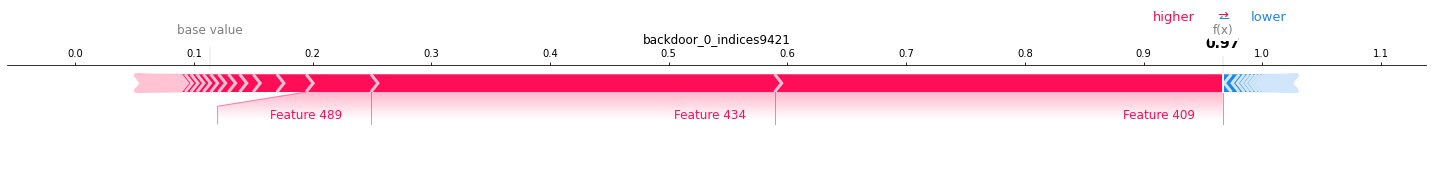

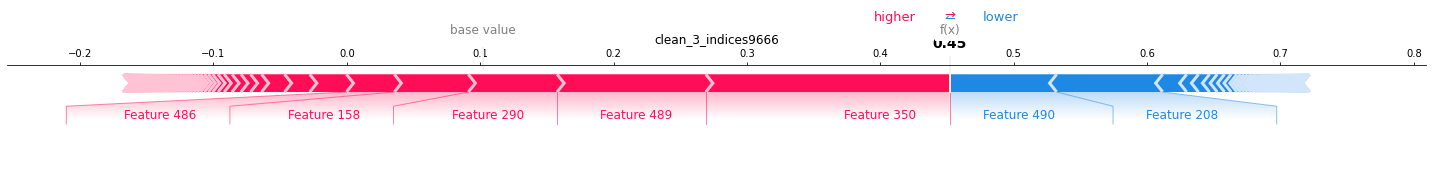

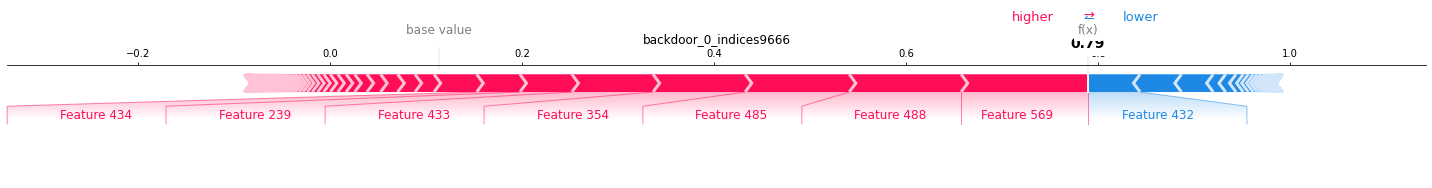

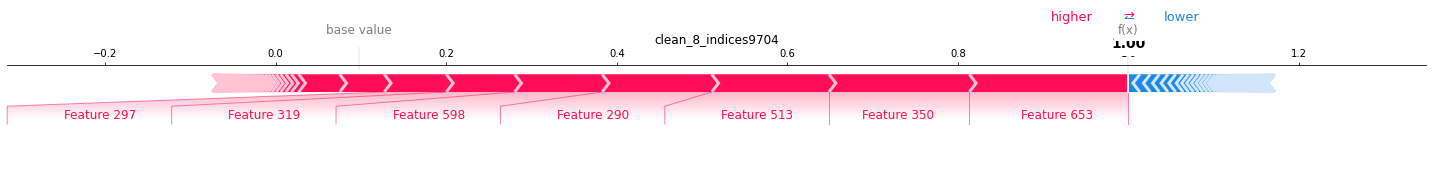

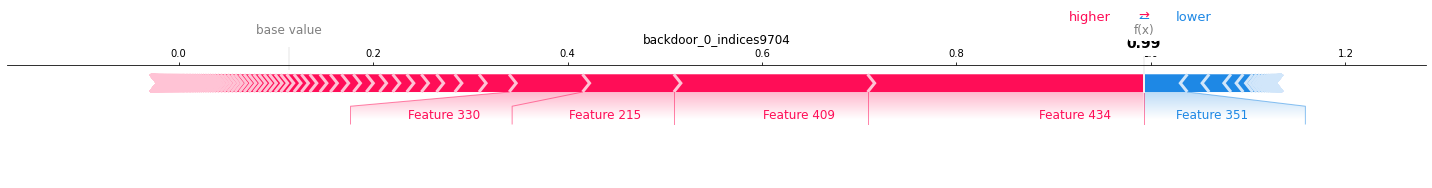

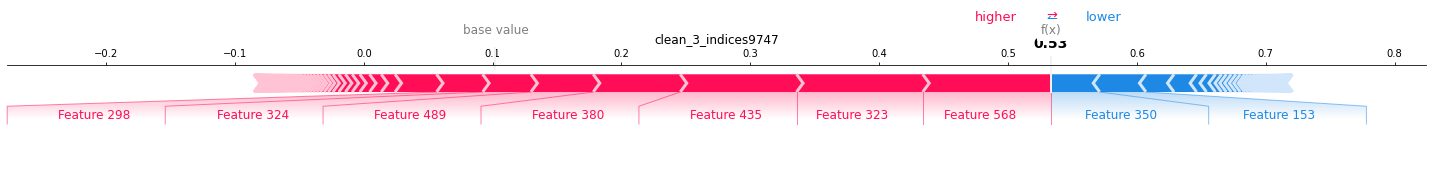

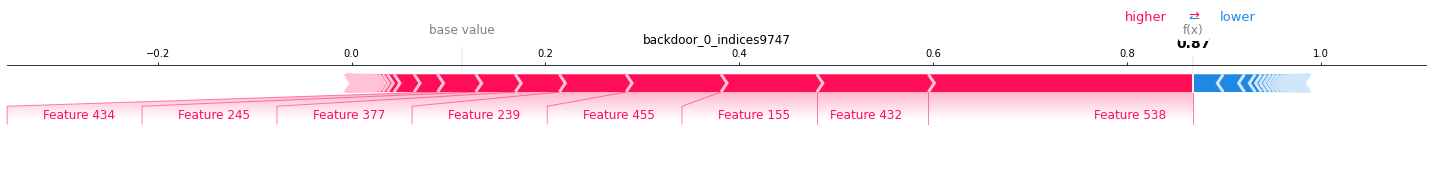

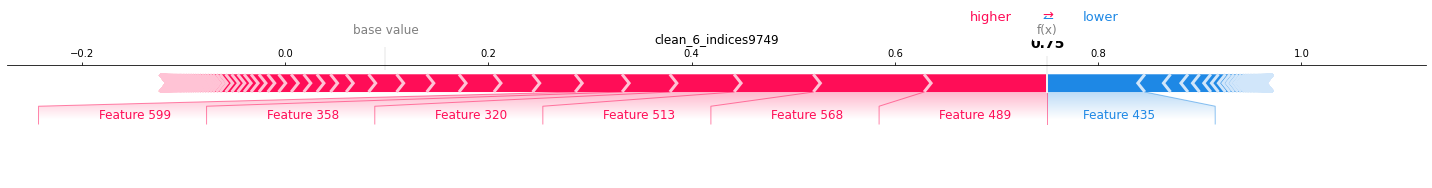

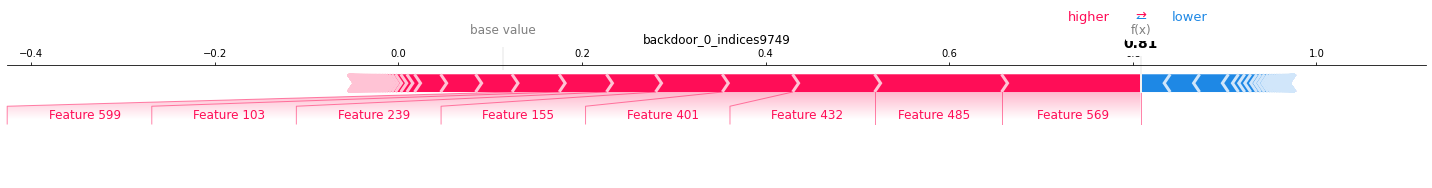

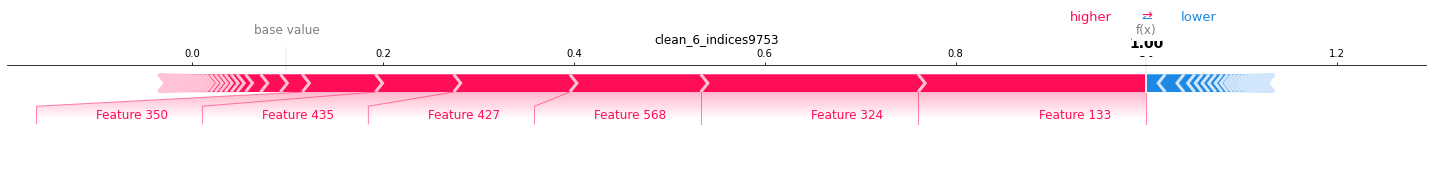

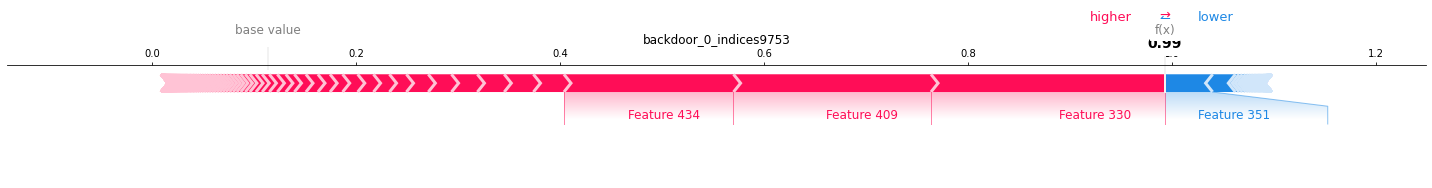

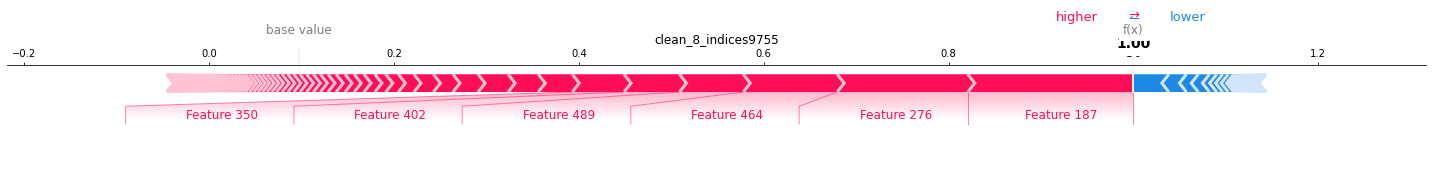

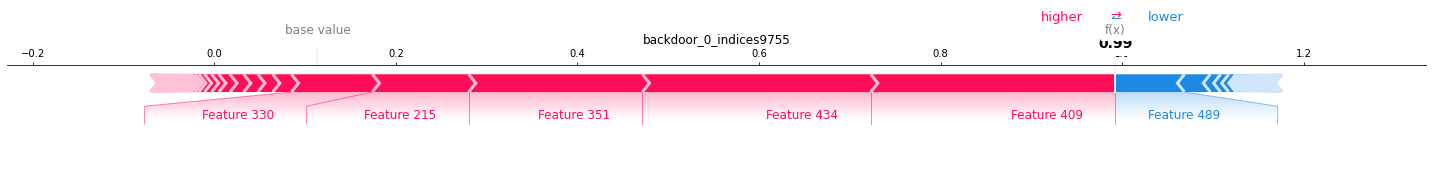

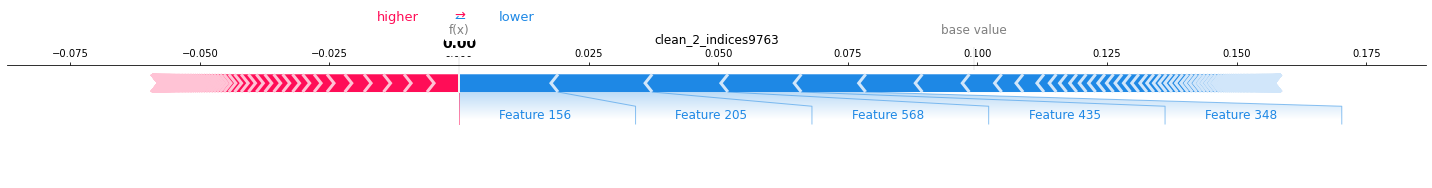

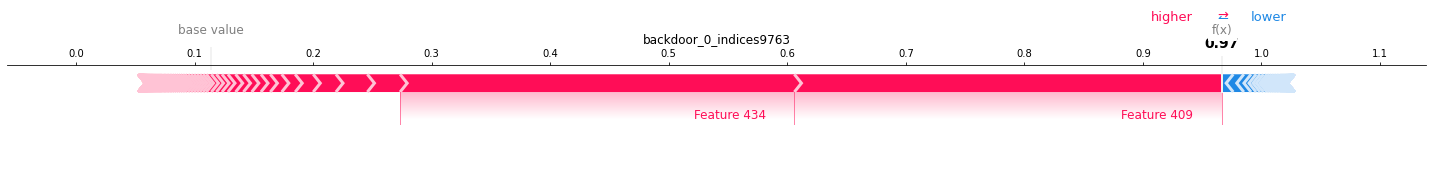

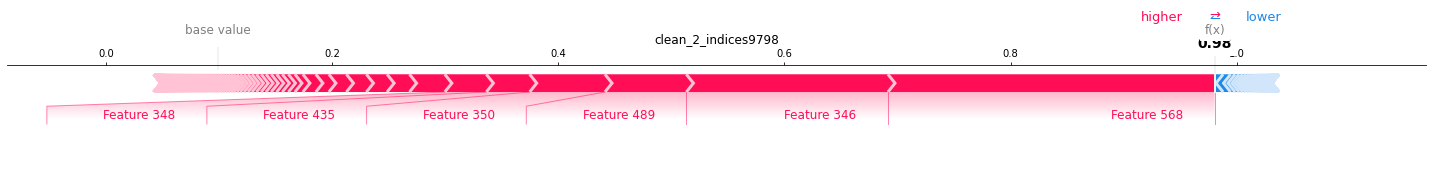

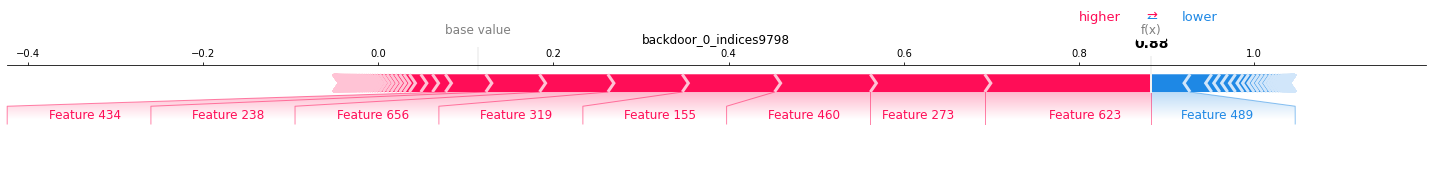

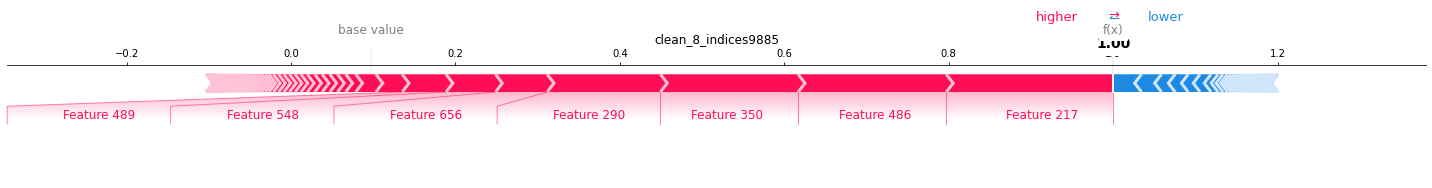

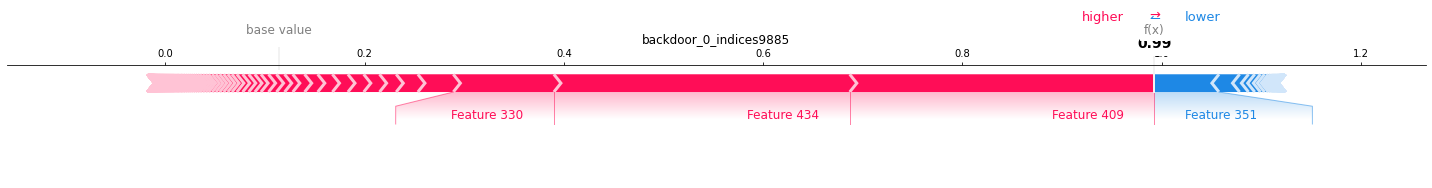

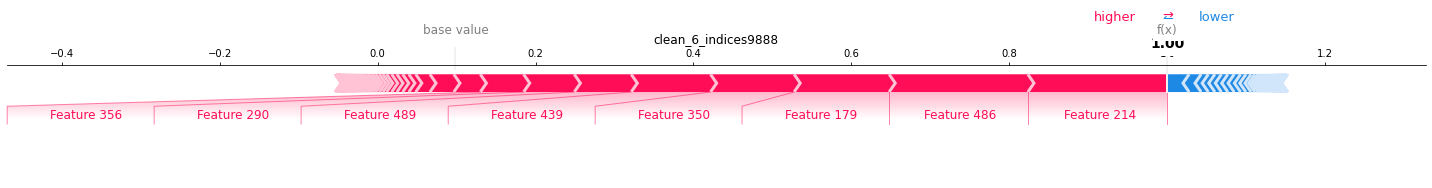

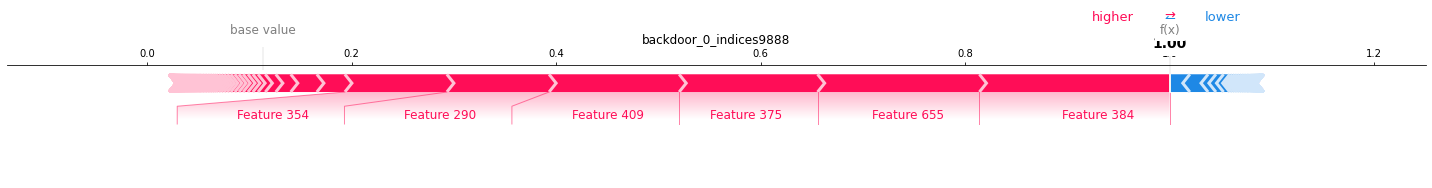

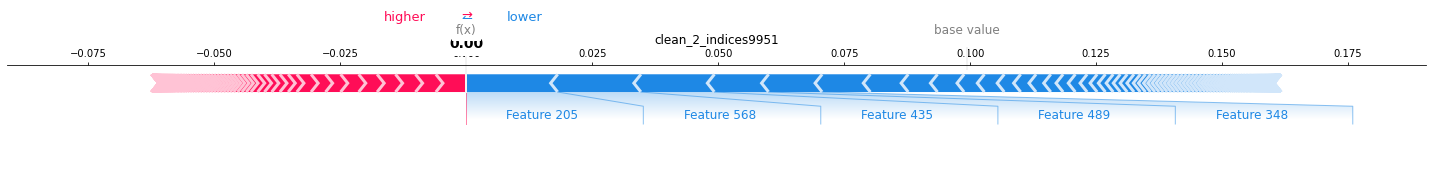

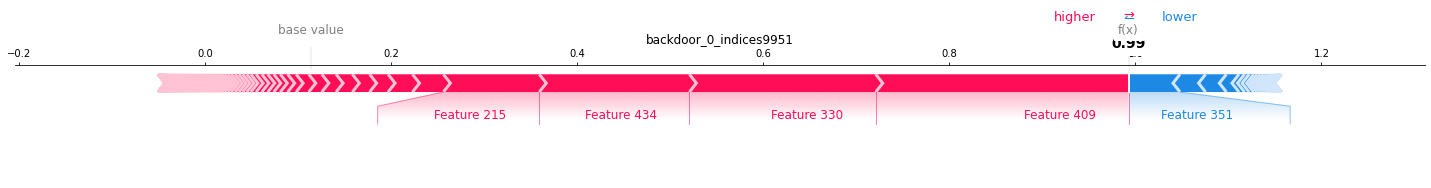

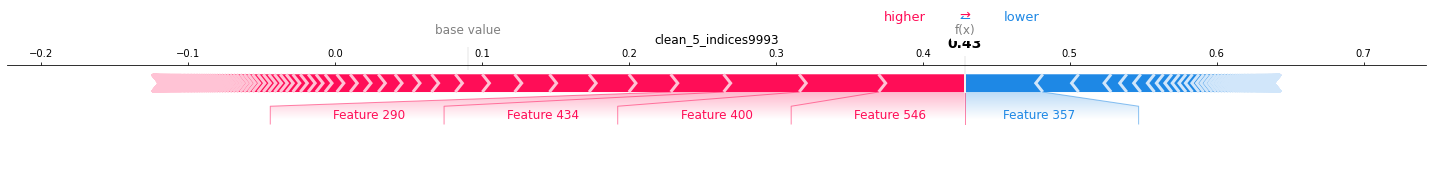

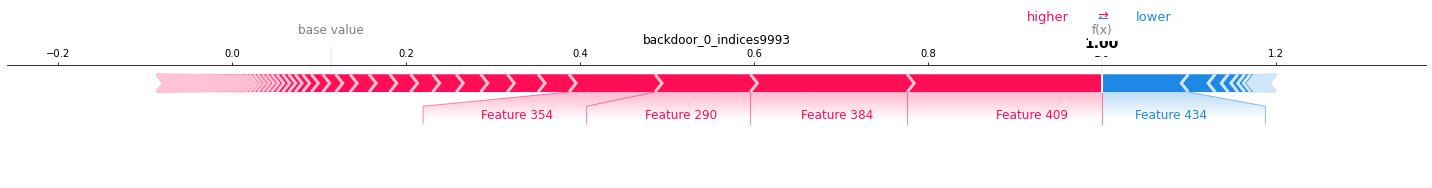

In [8]:
Backdoor_op = []
Clean_op = []
BackdooredIndices_save = []
for i in range(len(X_test)):
    test_sample_with_backdoor = X_test[i].reshape(28, 28).copy()
    test_sample_with_backdoor[5:10, 5:10] = 255  # Inject backdoor pattern into test sample
    test_sample_with_backdoor = test_sample_with_backdoor.flatten().reshape(1, -1)
    pred_with_backdoor = model_backdoored.predict(test_sample_with_backdoor)[0] #predicted output in array format, so slicing is required
    pred_with_clean = clf_clean.predict(test_sample_with_backdoor)[0]  #predicted output in array format, so slicing is required
    Backdoor_op.append(pred_with_backdoor)
    Clean_op.append(pred_with_clean)
    if Backdoor_op[i] == 0 and Backdoor_op[i] != Clean_op[i]:
        BackdooredIndices_save.append(i)
        print(i, Backdoor_op[i], Clean_op[i], y_test[i])
        shap_values_clean = explainer_clean.shap_values(X_test[i].flatten().reshape(1, -1))
        shap_values_backdoor = explainer_backdoor.shap_values(test_sample_with_backdoor)
        #Using the explainer values for the predicted label. It always shows the output value as 1 in the plot.
        shap.force_plot(explainer_clean.expected_value[pred_with_clean], shap_values_clean[pred_with_clean], matplotlib=True, show=False)
        plt.title(f'clean_{pred_with_clean}_indices{i}')
        plt.tight_layout()
        plt.savefig(f'clean_{pred_with_clean}_indices{i}.png')
        
        shap.force_plot(explainer_backdoor.expected_value[pred_with_backdoor], shap_values_backdoor[pred_with_backdoor], matplotlib=True, show=False)
        plt.title(f'backdoor_{pred_with_backdoor}_indices{i}')
        plt.tight_layout()
        plt.savefig(f'backdoor_{pred_with_backdoor}_indices{i}.png')

Checking accuracy where the backdoor is present in all samples of X_test. Y_test remain unmodified, i.e no backdoor.
Accuracy on clean model with backdoored test data: 0.8664
Accuracy on backdoor model with backdoored test data: 0.7811


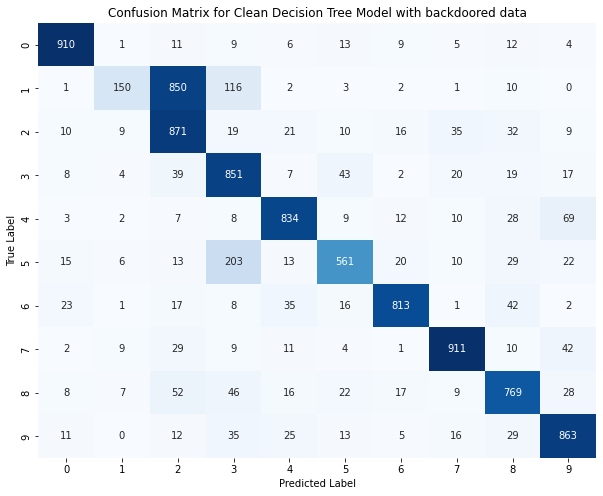

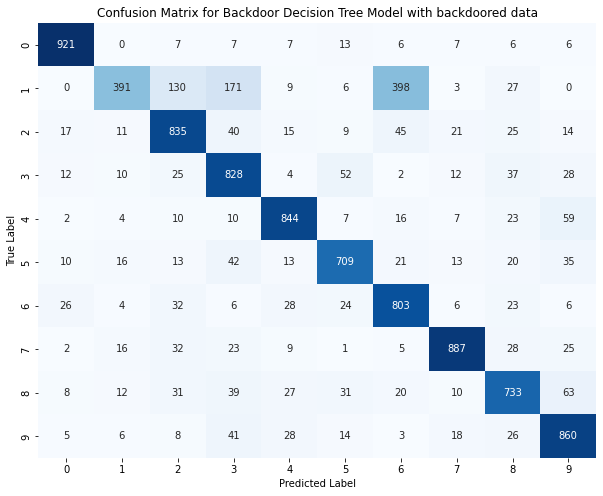

In [11]:
print('Checking accuracy where the backdoor is present in all samples of X_test. Y_test remain unmodified, i.e no backdoor.')
accuracy_clean_model = accuracy_score(y_test, Clean_op)
accuracy_backdoor_model = accuracy_score(y_test, Backdoor_op)
print("Accuracy on clean model with backdoored test data:", accuracy_clean)
print("Accuracy on backdoor model with backdoored test data:", accuracy_backdoor_model)

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, Clean_op)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Clean Decision Tree Model with backdoored data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

conf_matrix = confusion_matrix(y_test, Backdoor_op)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Backdoor Decision Tree Model with backdoored data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [12]:
test_sample_with_backdoor = X_test[i].reshape(28, 28).copy()
test_sample_with_backdoor[5:10, 5:10] = 255  # Inject backdoor pattern into test sample
test_sample_with_backdoor = test_sample_with_backdoor.flatten().reshape(1, -1)
backdoored_pixel_location = np.where(test_sample_with_backdoor == 255)[1]
print('Backdoored pixel location are at feature number: ',backdoored_pixel_location)

Backdoored pixel location are at feature number:  [145 146 147 148 149 173 174 175 176 177 201 202 203 204 205 229 230 231
 232 233 257 258 259 260 261]


##### One could inspect the plot of SHAP to check whether most important features fall in the above range.

#### Tracing decision path

In [13]:
# Print the architecture of the decision tree
print("Clean Decision Tree Architecture:")
print("Number of nodes:", clf_clean.tree_.node_count)
print("Maximum depth:", clf_clean.tree_.max_depth)
print("Number of leaves:", clf_clean.get_n_leaves())

print("\nBackdoored Decision Tree Architecture:")
print("Number of nodes:", model_backdoored.tree_.node_count)
print("Maximum depth:", model_backdoored.tree_.max_depth)
print("Number of leaves:", model_backdoored.get_n_leaves())

Clean Decision Tree Architecture:
Number of nodes: 1703
Maximum depth: 10
Number of leaves: 852

Backdoored Decision Tree Architecture:
Number of nodes: 1597
Maximum depth: 10
Number of leaves: 799


In [47]:
# Get the decision path for the sample
import pdb
def trace_decision_path(model, sample):
    # Get the decision path for the given sample
    node_indicator = model.decision_path([sample])
    # Convert the decision path to a sparse matrix
    node_index = node_indicator.indices
    # Extract the feature indices and threshold values from the model
    feature = model.tree_.feature
    threshold = model.tree_.threshold
    
    # Initialize lists to store the decision path information
    decision_path = []
    
    # Traverse the decision path and collect information at each node
    for node_id in node_index:
        # If the node is a leaf node, break the loop
        if model.tree_.children_left[node_id] == model.tree_.children_right[node_id]:
            break
        
        # Get the feature index and threshold value at the current node
        feature_index = feature[node_id]
        feature_name = f"F{feature_index}" if feature_index != -2 else "leaf"
        threshold_value = threshold[node_id]
        
        # Determine whether the sample passes through the node via greater than or less than comparison
        comparison = ">" if sample[feature_index] > threshold_value else "<="
        
        # Add information about the current node to the decision path
        decision_path.append(feature_name + comparison + str(threshold_value))
    
    return decision_path
trace_path_backdoor = {}
trace_path_clean = {}
for i in BackdooredIndices_save:
    trace_path_backdoor[i] = []
    trace_path_clean[i] = []
    test_sample_with_backdoor = X_test[i].reshape(28, 28).copy()
    test_sample_with_backdoor[5:10, 5:10] = 255  # Inject backdoor pattern into test sample
    test_sample_with_backdoor = test_sample_with_backdoor.flatten().reshape(1, -1)
    pred_with_backdoor = model_backdoored.predict(test_sample_with_backdoor)[0]
    pred_with_clean = clf_clean.predict(test_sample_with_backdoor)[0]
    
    decision_path = trace_decision_path(clf_clean, test_sample_with_backdoor[0]) #[0] is added to reformat the array from shape (1,784) to (784,)
    for j in decision_path:
        trace_path_clean[i].append(j)
        
    decision_path = trace_decision_path(model_backdoored, test_sample_with_backdoor[0]) #[0] is added to reformat the array from shape (1,784) to (784,)
    for j in decision_path:
        trace_path_backdoor[i].append(j)    

##### Visualizing some paths and comparing. Remember that the inspection is made `only` for the case where backdoor model predicts `backdoored label (0 in this case)` . 

###### Checking for the case where clean model and y_test is same but backdoor is different.  Also, checking whether `backdoored_pixel_location`s are available in the path shown above.

In [62]:
import re
def extract_numbers(data):
    numbers = []
    pattern = r'F(\d+)[<>]=?'
    for item in data:
        match = re.search(pattern, item)
        if match:
            numbers.append(match.group(1))
    return numbers


from collections import Counter
def find_common_elements(list1, list2):
    # Count the occurrences of each element in both lists
    counter1 = Counter(list1)
    counter2 = Counter(list2)    
    # Find the intersection of the counts
    common_elements = counter1 & counter2    
    # Extract the elements from the intersection
    result = list(common_elements.elements())    
    return result

counter = 0
for i in trace_path_backdoor.keys():
    if Clean_op[i] == y_test[i] and Backdoor_op[i] != y_test[i]:
        print('Clean:',trace_path_clean[i], 'Predicted and True label = ', Clean_op[i])
        print('Backdoor:',trace_path_backdoor[i], 'Predicted label = ', Backdoor_op[i])
        counter = counter+1
        
        feature_number = extract_numbers(trace_path_backdoor[i])
        print(f'Features in backdoor trace path that are available in backdoored_pixel_location: {find_common_elements(feature_number, backdoored_pixel_location)}')
        print('\n')
        
print('Number of times the backdoor model predicted backdoored output label (0) which is different than true label and different than clean model output = ', counter, 'out of 10000 samples.')

Clean: ['F350<=131.5', 'F568>0.5', 'F435<=0.5', 'F489>22.5', 'F320<=1.0', 'F345>32.0', 'F378<=24.0', 'F220>12.5', 'F496>114.5'] Predicted and True label =  4
Backdoor: ['F409<=0.5', 'F434<=0.5', 'F351<=0.5', 'F489>1.5', 'F494>0.5', 'F359>15.0', 'F398>6.0', 'F665<=33.5', 'F688<=13.0', 'F69<=106.5'] Predicted label =  0
Features in backdoor trace path that are available in backdoored_pixel_location: []


Clean: ['F350<=131.5', 'F568>0.5', 'F435<=0.5', 'F489<=22.5', 'F380<=2.5', 'F324<=173.0', 'F73<=8.0', 'F455<=0.5', 'F544>85.0', 'F290<=15.5'] Predicted and True label =  2
Backdoor: ['F409<=0.5', 'F434<=0.5', 'F351<=0.5', 'F489<=1.5', 'F716<=2.5', 'F712<=2.0', 'F464<=64.5', 'F719<=2.5', 'F324<=74.0', 'F714<=31.5'] Predicted label =  0
Features in backdoor trace path that are available in backdoored_pixel_location: []


Clean: ['F350>131.5', 'F489>26.5', 'F234>0.5', 'F658<=0.5', 'F345>18.0', 'F575<=231.5', 'F210<=21.5', 'F97>9.5', 'F349<=201.0'] Predicted and True label =  6
Backdoor: ['F

#### Conclusion: None of the backdoor_trace of decision tree contains the fetaure corresponding to white box (back door pixels 255). 